# Harry Potter Movie Review Analysis 
## By Ali Ho 

In [1]:
#Packages and functions to be used
import os 

#For regex 
import re

#importing pandas 
import pandas as pd 

#To create a wordcloud/graphs
import numpy as np 
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm 
from colorspacious import cspace_converter
import seaborn as sns
#Allows for randomization, you can set a seed to have reproducable results
import random

#from PIL import Image
from PIL import ImageFilter
import numpy as np
#Allows for several values for the same dictionary key 
import multidict

#To get a count of words (used in the term_frequency)
from collections import Counter 

#NLTK Packages 
#To process text using nltk (remove stopwords, lemmatize, tokenize...)
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
#Porter stemmer 
from nltk.stem.porter import PorterStemmer 

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

#To perform machine learning in Naive Bayes I need to import the following packages 
from sklearn.model_selection import train_test_split 
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
#Multinomrial classifier for naive bayes
from sklearn.naive_bayes import MultinomialNB
#SVMs 
from sklearn.svm import SVC
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
#confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

### Functions I created that will be used in the document: 

In [2]:
#Function 1: Creating a function to read in my files. This function will read in all the files in a specific directory. 
    #inputs: list of all of the file names to read 
    #        the path where the files are located 
    #outputs: a list, each element in the list is the content for each file that was read in. 
def reading_in_files(list_of_file_names, path):
    empty_list = []
    for file in list_of_file_names: 
        file = open(path+ "\\" + file)
        data = file.read() 
        empty_list.append(data)
        file.close()
    return(empty_list)

#Function 2: Creating a function to split the output from the just_compound_and_doc function. 
    #inputs: the list that is to be split,
            #the item that we want to split on 
    #outputs: a list of split lists that when put into a df, will create columns based on where the list was split
def list_split(list_to_be_split, item_to_split_on):
    empty_list = []
    for element in list_to_be_split: 
        empty_list.append(element.split(item_to_split_on))
    return(empty_list)

#Function 2: Vader (from NLTK) sentiment intensity score calculator. This function will calculate the polarity score 
#for each file. It will return a list of dictionaries. Each dictionary will contain the following: a compound score, 
#positive score, negative score, neutral score, and the opinion. 
    #inputs: a list of the content to be analyzed (this is what is returned in the reading_in_files function)
    #Output: a list of dictionaries. Each dictionary will contain the following: a compound score, postive score, 
    #        negative score, neutral score, and the opinion 
def sentiment_intensity_score(sentiment_files): 
    sent_analyze = SIA()
    results = []
    for word in sentiment_files: 
        score = sent_analyze.polarity_scores(word)
        score["sentiment_file"] = word 
        results.append(score)
    return(results)


#Function 3: 
    #What the function does: to be creating a list of reviews, then joining the reviews together to a string and 
                             #getting a count for each word in the string
    #Input: df and column 
    #Output: a dictionary with each word and the count of the word
def creating_freq_list_from_df_to_dict(df, column):
    reviews = df[column].tolist() 
    review_string = " ".join(reviews)
    review_string = review_string.split()
    review_dict = Counter(review_string)
    return review_dict

#Function 3: 
    #What the function does: creates a word cloud that is in the shape of the mask passed in
    #Input: the location where the mask image is saved, the frequency word dictionary, and the max # of words to include
            #and the title of the plot 
def create_word_cloud_with_mask(path_of_mask_image, dictionary, 
                                max_num_words, title):
        mask = np.array(Image.open(path_of_mask_image))
        #creating the word cloud 
        word_cloud = WordCloud(background_color = "white", 
                               max_words = max_num_words, 
                              mask = mask, max_font_size = 125, 
                              random_state = 1006)
        word_cloud.generate_from_frequencies(dictionary)
        #creating the coloring for the word cloud 
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize = [8,8])
        plt.imshow(word_cloud.recolor(color_func = image_colors), 
                  interpolation = "bilinear")
        plt.title(title)
        sns.set_context("poster")
        plt.axis("off")
        return plt

#Function 4: 
    #What the function does: creates a df with two columns: word and count of the top 12 words
    #Input: the word frequency dictionary 
    #Output: a df with the top 12 words 
def word_freq_dict_to_df_top_words(dictionary, number_of_words_wanted): 
    df = pd.DataFrame.from_dict(dictionary,orient='index')
    df.columns = ["count"]
    df["word"] = df.index
    df.reset_index(drop = True, inplace = True)
    df.sort_values(by=["count"], ascending = False, inplace = True)
    df = df[:number_of_words_wanted]
    return(df)

#Function 5: 
    #What the function does: creates a bar graph
    #Input: the df and title of the graph 
    #Output: the bar graph
def top_words_bar_plot(df, title): 
    with sns.plotting_context("talk"):
        graph = sns.barplot(y = "count", x = "word", data = df, 
                           palette = "GnBu_d")
        plt.title(title)
        plt.xlabel("Word")
        plt.ylabel("Count")
        plt.xticks(rotation = 90)
        return plt

#Function 6: 
    #What the function does: creates a df with two columns: word and count 
    #Input: the word frequency dictionary 
    #Output: a df
def word_freq_dict_to_df_all_words(dictionary): 
    df = pd.DataFrame.from_dict(dictionary,orient='index')
    df.columns = ["count"]
    df["word"] = df.index
    df.reset_index(drop = True, inplace = True)
    df.sort_values(by=["count"], ascending = False, inplace = True)
    return(df)
    
#Function 7: 
    #What the function does: Returns 2 statements: One with the total number of words and the other with the number 
                            #of unique words 
        #Input: the frequency count dictionary 
        #output: 2 statements 
def total_words_unique_words(dictionary): 
    eda_reviews_all_words = word_freq_dict_to_df_all_words(dictionary)
    print("The total number of words is", sum(eda_reviews_all_words["count"]))
    print("The total number of unique words is", len(dictionary)) 
    
#Function 8: 
    #What the function does: It duplicates the words in each review that are in all caps. 
    #Input: the review to be analyzed
    #Output: a new review where the first words of the review are the duplicated words from all caps and 
            #then the original review follows
def duplicate_all_cap_words(review): 
    capitalized_word = ""
    for word in re.findall('([A-Z][A-Z]+\w)', review):
        if word in review: 
            capitalized_word = capitalized_word + " " + word
    new_review = capitalized_word +" " + review
    return new_review

#Function 8: 
def get_count_of_all_cap_words(review): 
    count = 0 
    for word in re.findall('([A-Z][A-Z]+\w)', review):
        if word in review: 
            count += 1
    return count

#Function 8: 
def get_count_of_all_words(review): 
    count = 0 
    for word in re.findall('([A-z]+\w)', review):
        if word in review: 
            count += 1
    return count

#Function 9: 
    #What the function does: It removes all words that have less than 3 characters in it. 
    #Input: The string to have stopwords removed 
    #Ouptut: The string with the words with 2 or less characters removed 
def remove_words_less_than_3_characters(string):
    new_string = ""
    for word in re.findall('[A-z][A-z]+\w', string): 
        new_string = new_string + " " + word
    return new_string

#Function 10: 
    #What the function does: Removes stopwords 
    #Input: a list of stopwords to be removed, the tokenized item that you want to remove stopwords in 
    #Output: the same item type back with the stopwords removed. 
def stop_word_removal(stopwords, item_that_you_want_to_remove_stopwords_in): 
    removed_stopwords = [] 
    for word in item_that_you_want_to_remove_stopwords_in: 
        if word in stopwords: 
            continue
        if word not in stopwords: 
            removed_stopwords.append(word)
    return(removed_stopwords)

#Function11: 
    #What the function does: It takes the tokens from the df and joins it into a string, then replaces the "," with a space
    #Input: the df and column to be changed 
    #Output: the data untokenized 
def getting_data_ready_for_freq(df, column): 
    df[column] = df[column].apply(",".join)
    df[column] = df[column].str.replace(",", " ")
    return(df[column])

#Function 12: 
    #What the function does: Takes the words in a column and uses the SentimentInstensityAnalyzer from nltk and 
                             #gets the sentiment score for every word in the column. If the word has a sentiment 
                             #score greater than or equal to .3 (max is 1) or less than or equal to -.3 (-1 is min)
                             #the word is added to the keep_words list if not the word will be removed. 
def pos_neg_words(column):
    sia = SIA()
    keep_words = []

    for word in column:
        if (sia.polarity_scores(word)['compound']) >= 0.005:
            keep_words.append(word)
        elif (sia.polarity_scores(word)['compound']) <= -0.005:
            keep_words.append(word)
        elif word == "not": 
            keep_words.append(word)
        else:
            continue               
    return keep_words

#Function 13: 
    #What the function does: It uses the Porter stemmer to stem each word in the column 
    #Input: the item that you want to be stemmed 
    #Output: the same item type back with the words stemmed 
def stem_fun(item_that_you_want_to_be_stemmed):     
    stemmer = PorterStemmer() 
    stemmed = [stemmer.stem(token) for token in item_that_you_want_to_be_stemmed]
    return(stemmed)

#Function 14: 
    #What the function does: It lemmatizes the data without using pos, meaning that it will not be as efficient
    #Input: item to be lemmatized (the column)
    #Output: the column lemmatized 
def lemma_func(item_to_lemmatize):
    lemmatizer = WordNetLemmatizer()
    lemmatized_review = []
    for token in item_to_lemmatize: 
        word = lemmatizer.lemmatize(token)
        lemmatized_review.append(word)
    return lemmatized_review

#Function 15: 
    #What the function does: Creates bigrams from a tokenized column in a dataframe
    #Input: the column that you want to create a ngram with 
    #Output: a list of ngrams
def creating_ngrams(item_to_be_ngrammed, number_of_ngram):
    # zip function helps generate ngrams
    ngrams = zip(*[item_to_be_ngrammed[i:] for i in range(number_of_ngram)])
    # Concatentate the tokens into ngrams and return
    return ["_".join(ngram) for ngram in ngrams]

#Function 16: 
    #What the function does: Create a bag of words from a column in a df... 
    #Input: df and column to be transformed 
    #Output: A list of dictionaries for each row in the df that contains the word as a key and the count as the value 
def bag_of_words(df, column_to_be_bagged):
    bag_of_words = [] 
    from collections import Counter 
    for word in df[column_to_be_bagged]: 
        bag_of_words.append(Counter(word))
    return bag_of_words

#Function 17: 
    #What the function does: Takes the bag of words and makes it into a giant sparse matrix df, with 0s where nas are
    #Input: bag of words 
    #Output: Giant df with the words as column names and counts as row entries 
def bow_to_df(bag_of_words): 
    df = pd.DataFrame.from_records(bag_of_words)
    df = df.fillna(0).astype(int)
    return(df)

#Function 18: 
    #What the function does: It normalizing the df by getting the sum of each row and then dividing every entry by 
                             #the sum, resulting in the percentage make-up of each word
    #Input: dataframe to be normalized 
    #Output: normalized dataframe 
def normalize_df(df):
    names = df.columns 
    df["total"] = df.sum(axis = 1)
    for name in names: 
        df[name] = df[name]/df["total"]
    return(df)

#Function 19: 
    #What the function does: Creates a confusion matrix graph 
    #Input: the confusion matrix, accuracy_label, and type of df 
    #Output: Confusion matrix graph
def confusion_matrix_graph (cm, accuracy_label, type_of_df): 
    g = plt.figure(figsize=(8, 8))
    g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', cbar = False);
    g = plt.ylabel('Actual');
    g = plt.xlabel('Predicted');
    g = all_sample_title = type_of_df +' Accuracy Score: {0}'.format(round(accuracy_label, 4))
    g = plt.title(all_sample_title, size = 12);
    return(g)


In [253]:
#First step is importing the documents
#Getting a list of all the file names in my pos file 
positive = os.listdir("C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\pos")
positive_path = "C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\pos"

#Getting a list of all the file names in my neg file 
negative = os.listdir("C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\neg")
negative_path = "C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\neg"

#### looking to see if I successfully got the file names 

In [254]:
print(positive[:10])

['10_hp1_0.txt', '10_hp1_1.txt', '10_hp1_10.txt', '10_hp1_11.txt', '10_hp1_12.txt', '10_hp1_13.txt', '10_hp1_14.txt', '10_hp1_15.txt', '10_hp1_16.txt', '10_hp1_18.txt']


#### looking at the first 10 items in the negative list to ensure I successfully extracted the file names 

In [255]:
print(negative[:10])

['1_hp1_1.txt', '1_hp1_10.txt', '1_hp1_11.txt', '1_hp1_12.txt', '1_hp1_13.txt', '1_hp1_14.txt', '1_hp1_15.txt', '1_hp1_16.txt', '1_hp1_17.txt', '1_hp1_18.txt']


#### Using my reading_in_file function to read in all of the positive files 

In [256]:
positive_reviews = reading_in_files(positive, positive_path)

#### Confirming that the function worked by looking at the first review

In [257]:
positive_reviews[3]

"10** Harry Potter and the Sorcerer's Stone\n== 10/10 - an unforgettable start to a fantastic film series and the career of the impeccable Emma Watson (and the other kids)"

#### The score is separated from the review by **, the title is separated from the review on ==. It is important to note, that if I split on the **, it is possible that the review will also be split. There is a high likelihood that the "**" characters are included in some of the review text as well. This will have to be addressed. 

In [258]:
positive_reviews = list_split(positive_reviews, "**")

#### Checking to make sure that it worked.

In [259]:
positive_reviews[3]

['10',
 " Harry Potter and the Sorcerer's Stone\n== 10/10 - an unforgettable start to a fantastic film series and the career of the impeccable Emma Watson (and the other kids)"]

#### Changing the positive_review list to a data frame. 

In [260]:
positive_df = pd.DataFrame(positive_reviews)

#### Looking at the first 5 rows 

In [261]:
positive_df.head()

0                                                  1     2     3     4   \
0  10   The Magic Comes To Life!\n== Once upon a time...  None  None  None   
1  10   Pure Magic\n== This movie is a delight for th...  None  None  None   
2  10   Enchantment, Trapdoor to Imaginary World.\n==...  None  None  None   
3  10   Harry Potter and the Sorcerer's Stone\n== 10/...  None  None  None   
4  10   Great Journey to the Magic World\n== I watch ...  None  None  None   

     5     6     7     8     9   ...    18    19    20    21    22    23  \
0  None  None  None  None  None  ...  None  None  None  None  None  None   
1  None  None  None  None  None  ...  None  None  None  None  None  None   
2  None  None  None  None  None  ...  None  None  None  None  None  None   
3  None  None  None  None  None  ...  None  None  None  None  None  None   
4  None  None  None  None  None  ...  None  None  None  None  None  None   

     24    25    26    27  
0  None  None  None  None  
1  None  None  None  None  
2  None  None  None  None  
3  None  None  None  None  
4  None  None  None  None  

[5 rows x 28 columns]

#### This shows that my worry about the reviews being split on ** was warranted. I need to joing the review text to one column.  Positive, is the the score was successfully extracted

In [262]:
positive_df["review"] = positive_df[positive_df.columns[1:]].apply(lambda row: " ".join(row.dropna().astype(str)), axis = 1)

#### selecting only column 0 (the rating) and the review column for the new dataframe. 

In [263]:
positive_df = positive_df[[0, "review"]]

In [264]:
positive_df.head()

0                                             review
0  10   The Magic Comes To Life!\n== Once upon a time...
1  10   Pure Magic\n== This movie is a delight for th...
2  10   Enchantment, Trapdoor to Imaginary World.\n==...
3  10   Harry Potter and the Sorcerer's Stone\n== 10/...
4  10   Great Journey to the Magic World\n== I watch ...

#### Changing the column names

In [265]:
positive_df.columns = ["rating", "review"]
positive_df.head()

rating                                             review
0     10   The Magic Comes To Life!\n== Once upon a time...
1     10   Pure Magic\n== This movie is a delight for th...
2     10   Enchantment, Trapdoor to Imaginary World.\n==...
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...
4     10   Great Journey to the Magic World\n== I watch ...

#### Repeating the process for the negative reviews

In [266]:
negative_reviews = reading_in_files(negative, negative_path)

In [267]:
negative_reviews[0]

'1** For Kids Only, Unfortunately\n== ***SLIGHT SPOILERS*** As an adult, it didn\'t appeal to me in the least. The effects were poorly done, the giant plot leap in the middle ("lots of strange things are happening-- hey, I know! it\'s definitely because the creepy teacher guy wants the thing under the trap door under the three-headed dog") threw me completely out of the story. It\'s really a kids only movie, which disappointed me, because I\'d been hearing such good things about it. And then at the end, Harry is sent back to his abusive adoptive parents. So much for changing one\'s situation.And I know that they had to cut tremendous amounts of story in order to make it only 2 1/2 hours long (which was still way too long for this movie). After waiting in line outside the theater with tickets bought a week ahead of time, I must say I was truly disappointed. I\'m even more saddened by the commercial success and the lunacy of die hard Harry Potter fans which will keep this sad and poorly-

In [268]:
negative_reviews = list_split(negative_reviews, "**")

In [269]:
negative_reviews[0]

['1',
 ' For Kids Only, Unfortunately\n== ',
 '*SLIGHT SPOILERS',
 '* As an adult, it didn\'t appeal to me in the least. The effects were poorly done, the giant plot leap in the middle ("lots of strange things are happening-- hey, I know! it\'s definitely because the creepy teacher guy wants the thing under the trap door under the three-headed dog") threw me completely out of the story. It\'s really a kids only movie, which disappointed me, because I\'d been hearing such good things about it. And then at the end, Harry is sent back to his abusive adoptive parents. So much for changing one\'s situation.And I know that they had to cut tremendous amounts of story in order to make it only 2 1/2 hours long (which was still way too long for this movie). After waiting in line outside the theater with tickets bought a week ahead of time, I must say I was truly disappointed. I\'m even more saddened by the commercial success and the lunacy of die hard Harry Potter fans which will keep this sad a

In [270]:
negative_df = pd.DataFrame(negative_reviews)
negative_df.head()

0                                                  1                 2   \
0  1                  For Kids Only, Unfortunately\n==   *SLIGHT SPOILERS   
1  1   An effects-laden excuse of an adaptation\n== ...              None   
2  1   Hollywood's greatest shame.\n== At first I li...              None   
3  1   Dismal, Contrived, Ripoff and just plain dumb...              None   
4  1                  Great storytelling, no story\n==           SPOILERS   

                                                  3     4     5     6     7   \
0  * As an adult, it didn't appeal to me in the l...  None  None  None  None   
1                                               None  None  None  None  None   
2                                               None  None  None  None  None   
3                                               None  None  None  None  None   
4  Before I briefly state my views, I must confes...              None  None   

     8     9   ...    16    17    18    19    20    21    22    23    24    25  
0  None  None  ...  None  None  None  None  None  None  None  None  None  None  
1  None  None  ...  None  None  None  None  None  None  None  None  None  None  
2  None  None  ...  None  None  None  None  None  None  None  None  None  None  
3  None  None  ...  None  None  None  None  None  None  None  None  None  None  
4  None  None  ...  None  None  None  None  None  None  None  None  None  None  

[5 rows x 26 columns]

In [271]:
negative_df["review"] = negative_df[negative_df.columns[1:]].apply(lambda row: " ".join(row.dropna().astype(str)), axis = 1)

In [272]:
negative_df.head()

0                                                  1                 2  \
0  1                  For Kids Only, Unfortunately\n==   *SLIGHT SPOILERS   
1  1   An effects-laden excuse of an adaptation\n== ...              None   
2  1   Hollywood's greatest shame.\n== At first I li...              None   
3  1   Dismal, Contrived, Ripoff and just plain dumb...              None   
4  1                  Great storytelling, no story\n==           SPOILERS   

                                                   3     4     5     6     7  \
0  * As an adult, it didn't appeal to me in the l...  None  None  None  None   
1                                               None  None  None  None  None   
2                                               None  None  None  None  None   
3                                               None  None  None  None  None   
4  Before I briefly state my views, I must confes...              None  None   

      8     9  ...    17    18    19    20    21    22    23    24    25  \
0  None  None  ...  None  None  None  None  None  None  None  None  None   
1  None  None  ...  None  None  None  None  None  None  None  None  None   
2  None  None  ...  None  None  None  None  None  None  None  None  None   
3  None  None  ...  None  None  None  None  None  None  None  None  None   
4  None  None  ...  None  None  None  None  None  None  None  None  None   

                                              review  
0   For Kids Only, Unfortunately\n==  *SLIGHT SPO...  
1   An effects-laden excuse of an adaptation\n== ...  
2   Hollywood's greatest shame.\n== At first I li...  
3   Dismal, Contrived, Ripoff and just plain dumb...  
4   Great storytelling, no story\n==  SPOILERS Be...  

[5 rows x 27 columns]

In [273]:
negative_df = negative_df[[0, "review"]]
negative_df.columns = ["rating", "review"]
negative_df.head()

rating                                             review
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...
1      1   An effects-laden excuse of an adaptation\n== ...
2      1   Hollywood's greatest shame.\n== At first I li...
3      1   Dismal, Contrived, Ripoff and just plain dumb...
4      1   Great storytelling, no story\n==  SPOILERS Be...

## EDA for positive reviews and negative reviews

In [274]:
positive_df.shape

(492, 2)

In [275]:
negative_df.shape

(492, 2)

#### *There is an equal number of positive and negative reviews in the data frames. Each data frame has 2 columns.*

### Using my creating_freq_list_from_df_to_dict function 

In [276]:
positive_dict = creating_freq_list_from_df_to_dict(positive_df, "review")

In [277]:
negative_dict = creating_freq_list_from_df_to_dict(negative_df, "review")

### Positive Word Cloud

In [278]:
#mask from http://clipart-library.com/clip-art/harry-potter-crest-silhouette-25.htm
#creating an array of arrays for the mask 
positive_word_cloud = create_word_cloud_with_mask("sorting_hat.PNG", positive_dict, 750, "Positive Review Word Cloud Pre-Cleaning")

## Negative Word Cloud 

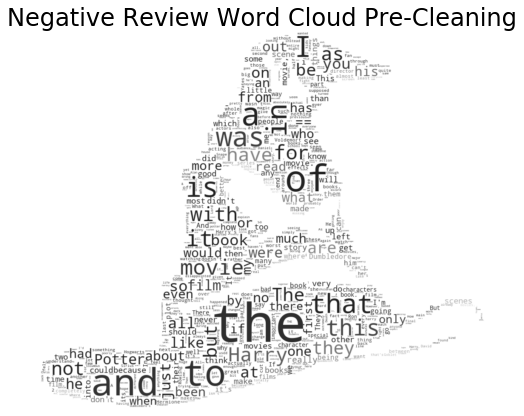

In [279]:
#mask from http://clipart-library.com/clip-art/harry-potter-crest-silhouette-25.htm
#creating an array of arrays for the mask 
negative_word_cloud = create_word_cloud_with_mask("sorting_hat.PNG", negative_dict, 750, "Negative Review Word Cloud Pre-Cleaning")

#### The positive and negative word cloud do not help with determining the differences in the reviews. The main word in both reviews is "the", followed by other words that do not indicate the sentiment of the review. The reviews need to be cleaned.

In [280]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(positive_dict, 12)
eda_reviews_top_words_pos

count  word
16    9779   the
47    4584   and
20    3880    of
35    3554    to
8     3078     a
85    2598    is
15    2229    in
502   1890     I
12    1762  that
231   1444    it
25    1415   was
99    1312    as

In [281]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(negative_dict, 12)
eda_reviews_top_words_neg

count  word
17    9801   the
131   3925   and
29    3766    of
14    3667    to
56    2907     a
35    2375     I
16    2161    in
75    2118    is
103   2064   was
89    1955  that
107   1411  this
11    1389    it

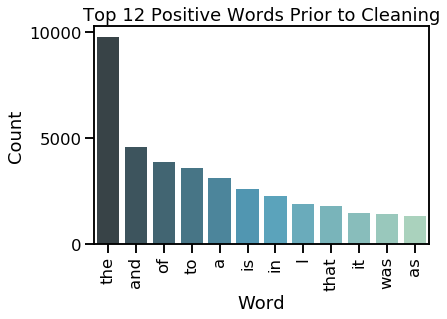

In [282]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 12 Positive Words Prior to Cleaning")

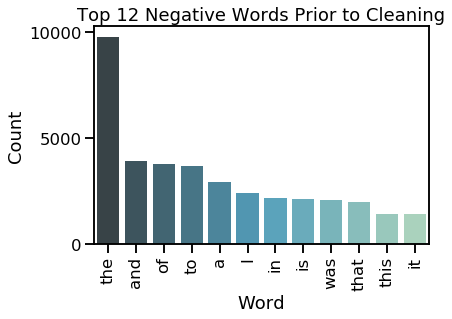

In [283]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 12 Negative Words Prior to Cleaning")

In [284]:
print("***** Positive *****")
total_words_unique_words(positive_dict)
print("***** Negative *****")
total_words_unique_words(negative_dict)

***** Positive *****
The total number of words is 152434
The total number of unique words is 17977
***** Negative *****
The total number of words is 154643
The total number of unique words is 19158


#### As part of the cleansing of the reviews, I am going to turn everything into lowercase, however, I do not want to lose the emphasis of words written in ALL CAPS. Therefore, I created a function, that will duplicate every word in the review that is in all caps. I think that it is fair, to count words in all caps as double.

In [285]:
positive_df["new_review"] = positive_df.apply(lambda row: duplicate_all_cap_words(row["review"]), axis = 1)

In [286]:
positive_df.head(10)

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   
5     10   The beginning of a magical journey\n== Harry ...   
6     10   Very Book Accurate and Enjoyable!!\n== Today ...   
7     10   Great\n== It brought out almost every potenti...   
8     10   One of my favorites\n== The most amazing stor...   
9     10   Absolutely amazing\n== Just amazing no words ...   

                                          new_review  
0    The Magic Comes To Life!\n== Once upon a tim...  
1    Pure Magic\n== This movie is a delight for t...  
2   IAN  Enchantment, Trapdoor to Imaginary World...  
3    Harry Potter and the Sorcerer's Stone\n== 10...  
4    Great Journey to the Magic World\n== I watch...  
5    The beginning of a magical journey\n== Harry...  
6   VERY LOVES  Very Book Accurate and Enjoyable!...  
7    Great\n== It brought out almost every potent...  
8   JKR  One of my favorites\n== The most amazing...  
9    Absolutely amazing\n== Just amazing no words...

In [287]:
positive_df["cap_count"] = positive_df.apply(lambda row: get_count_of_all_cap_words(row["review"]), axis =1)

In [288]:
positive_df.head(10)

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   
5     10   The beginning of a magical journey\n== Harry ...   
6     10   Very Book Accurate and Enjoyable!!\n== Today ...   
7     10   Great\n== It brought out almost every potenti...   
8     10   One of my favorites\n== The most amazing stor...   
9     10   Absolutely amazing\n== Just amazing no words ...   

                                          new_review  cap_count  
0    The Magic Comes To Life!\n== Once upon a tim...          0  
1    Pure Magic\n== This movie is a delight for t...          0  
2   IAN  Enchantment, Trapdoor to Imaginary World...          1  
3    Harry Potter and the Sorcerer's Stone\n== 10...          0  
4    Great Journey to the Magic World\n== I watch...          0  
5    The beginning of a magical journey\n== Harry...          0  
6   VERY LOVES  Very Book Accurate and Enjoyable!...          2  
7    Great\n== It brought out almost every potent...          0  
8   JKR  One of my favorites\n== The most amazing...          1  
9    Absolutely amazing\n== Just amazing no words...          0

In [289]:
positive_df["all_words_count"] = positive_df.apply(lambda row: get_count_of_all_words(row["review"]), axis = 1)

In [290]:
positive_df.head(10)

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   
5     10   The beginning of a magical journey\n== Harry ...   
6     10   Very Book Accurate and Enjoyable!!\n== Today ...   
7     10   Great\n== It brought out almost every potenti...   
8     10   One of my favorites\n== The most amazing stor...   
9     10   Absolutely amazing\n== Just amazing no words ...   

                                          new_review  cap_count  \
0    The Magic Comes To Life!\n== Once upon a tim...          0   
1    Pure Magic\n== This movie is a delight for t...          0   
2   IAN  Enchantment, Trapdoor to Imaginary World...          1   
3    Harry Potter and the Sorcerer's Stone\n== 10...          0   
4    Great Journey to the Magic World\n== I watch...          0   
5    The beginning of a magical journey\n== Harry...          0   
6   VERY LOVES  Very Book Accurate and Enjoyable!...          2   
7    Great\n== It brought out almost every potent...          0   
8   JKR  One of my favorites\n== The most amazing...          1   
9    Absolutely amazing\n== Just amazing no words...          0   

   all_words_count  
0              954  
1               98  
2              446  
3               25  
4               76  
5              582  
6               97  
7               14  
8               67  
9               13

In [291]:
positive_df["percent_cap"] = positive_df["cap_count"]/positive_df["all_words_count"]

In [292]:
positive_df.head(10)

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   
5     10   The beginning of a magical journey\n== Harry ...   
6     10   Very Book Accurate and Enjoyable!!\n== Today ...   
7     10   Great\n== It brought out almost every potenti...   
8     10   One of my favorites\n== The most amazing stor...   
9     10   Absolutely amazing\n== Just amazing no words ...   

                                          new_review  cap_count  \
0    The Magic Comes To Life!\n== Once upon a tim...          0   
1    Pure Magic\n== This movie is a delight for t...          0   
2   IAN  Enchantment, Trapdoor to Imaginary World...          1   
3    Harry Potter and the Sorcerer's Stone\n== 10...          0   
4    Great Journey to the Magic World\n== I watch...          0   
5    The beginning of a magical journey\n== Harry...          0   
6   VERY LOVES  Very Book Accurate and Enjoyable!...          2   
7    Great\n== It brought out almost every potent...          0   
8   JKR  One of my favorites\n== The most amazing...          1   
9    Absolutely amazing\n== Just amazing no words...          0   

   all_words_count  percent_cap  
0              954     0.000000  
1               98     0.000000  
2              446     0.002242  
3               25     0.000000  
4               76     0.000000  
5              582     0.000000  
6               97     0.020619  
7               14     0.000000  
8               67     0.014925  
9               13     0.000000

In [293]:
positive_df.drop(["cap_count", "all_words_count"], axis = 1, inplace = True)

In [294]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  
0    The Magic Comes To Life!\n== Once upon a tim...     0.000000  
1    Pure Magic\n== This movie is a delight for t...     0.000000  
2   IAN  Enchantment, Trapdoor to Imaginary World...     0.002242  
3    Harry Potter and the Sorcerer's Stone\n== 10...     0.000000  
4    Great Journey to the Magic World\n== I watch...     0.000000

In [295]:
positive_df.tail(10)

rating                                             review  \
482      9   Review - Harry Potter and the Deathly Hallows...   
483      9   It's Official... Epic Movie, Epic Saga and Ep...   
484      9   sadly disappointing\n== I have now been to se...   
485      9   The end is good..\n== Yesterday i went to a p...   
486      9   They finally got it right!\n== While never an...   
487      9   I'm Sorry, Hermoine and Ron Who?\n== The one ...   
488      9   A fantastic ending\n== This movie was the per...   
489      9   LEGENDARY!\n== Best cinematic universe out th...   
490      9   Good but ending changed for worse\n== I was r...   
491      9   Great conclusion, of fantastic story\n== i wa...   

                                            new_review  percent_cap  
482    Review - Harry Potter and the Deathly Hallow...     0.000000  
483    It's Official... Epic Movie, Epic Saga and E...     0.000000  
484    sadly disappointing\n== I have now been to s...     0.000000  
485    The end is good..\n== Yesterday i went to a ...     0.000000  
486   THIS HP7 THE  They finally got it right!\n== ...     0.007353  
487    I'm Sorry, Hermoine and Ron Who?\n== The one...     0.000000  
488    A fantastic ending\n== This movie was the pe...     0.000000  
489   LEGENDARY  LEGENDARY!\n== Best cinematic univ...     0.111111  
490    Good but ending changed for worse\n== I was ...     0.000000  
491   AWESOME  Great conclusion, of fantastic story...     0.006135

#### repeating the process for the negative reviews df 

In [296]:
negative_df["new_review"] = negative_df.apply(lambda row: duplicate_all_cap_words(row["review"]), axis = 1)

In [297]:
negative_df["cap_count"] = negative_df.apply(lambda row: get_count_of_all_cap_words(row["review"]), axis =1)

In [298]:
negative_df["all_words_count"] = negative_df.apply(lambda row: get_count_of_all_words(row["review"]), axis = 1)

In [299]:
negative_df.head(10)

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   
5      1   It's bland like drinking warm water\n== Warni...   
6      1   Harry Potter and the Chamber of Commerce\n== ...   
7      1   its not worth the piece of paper the ticket w...   
8      1   My Revenge for the Non Fans!!\n== Harry Potte...   
9      1   Terrible Terrible film\n== How on earth did t...   

                                          new_review  cap_count  \
0   SLIGHT SPOILERS  For Kids Only, Unfortunately...          2   
1    An effects-laden excuse of an adaptation\n==...          0   
2   WOW HAD RINGWRAITHS ENTZ SHELOB YEAH  Hollywo...          6   
3   JRR  Dismal, Contrived, Ripoff and just plain...          1   
4   SPOILERS LOT  Great storytelling, no story\n=...          2   
5    It's bland like drinking warm water\n== Warn...          0   
6    Harry Potter and the Chamber of Commerce\n==...          0   
7    its not worth the piece of paper the ticket ...          0   
8   AOL  My Revenge for the Non Fans!!\n== Harry ...          1   
9    Terrible Terrible film\n== How on earth did ...          0   

   all_words_count  
0              185  
1              170  
2              589  
3              168  
4              600  
5              366  
6              305  
7              123  
8              349  
9              321

In [300]:
negative_df["percent_cap"] = negative_df["cap_count"]/negative_df["all_words_count"]

In [301]:
negative_df.head(10)

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   
5      1   It's bland like drinking warm water\n== Warni...   
6      1   Harry Potter and the Chamber of Commerce\n== ...   
7      1   its not worth the piece of paper the ticket w...   
8      1   My Revenge for the Non Fans!!\n== Harry Potte...   
9      1   Terrible Terrible film\n== How on earth did t...   

                                          new_review  cap_count  \
0   SLIGHT SPOILERS  For Kids Only, Unfortunately...          2   
1    An effects-laden excuse of an adaptation\n==...          0   
2   WOW HAD RINGWRAITHS ENTZ SHELOB YEAH  Hollywo...          6   
3   JRR  Dismal, Contrived, Ripoff and just plain...          1   
4   SPOILERS LOT  Great storytelling, no story\n=...          2   
5    It's bland like drinking warm water\n== Warn...          0   
6    Harry Potter and the Chamber of Commerce\n==...          0   
7    its not worth the piece of paper the ticket ...          0   
8   AOL  My Revenge for the Non Fans!!\n== Harry ...          1   
9    Terrible Terrible film\n== How on earth did ...          0   

   all_words_count  percent_cap  
0              185     0.010811  
1              170     0.000000  
2              589     0.010187  
3              168     0.005952  
4              600     0.003333  
5              366     0.000000  
6              305     0.000000  
7              123     0.000000  
8              349     0.002865  
9              321     0.000000

In [302]:
negative_df.drop(["cap_count", "all_words_count"], axis = 1, inplace = True)

In [303]:
negative_df.head(10)

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   
5      1   It's bland like drinking warm water\n== Warni...   
6      1   Harry Potter and the Chamber of Commerce\n== ...   
7      1   its not worth the piece of paper the ticket w...   
8      1   My Revenge for the Non Fans!!\n== Harry Potte...   
9      1   Terrible Terrible film\n== How on earth did t...   

                                          new_review  percent_cap  
0   SLIGHT SPOILERS  For Kids Only, Unfortunately...     0.010811  
1    An effects-laden excuse of an adaptation\n==...     0.000000  
2   WOW HAD RINGWRAITHS ENTZ SHELOB YEAH  Hollywo...     0.010187  
3   JRR  Dismal, Contrived, Ripoff and just plain...     0.005952  
4   SPOILERS LOT  Great storytelling, no story\n=...     0.003333  
5    It's bland like drinking warm water\n== Warn...     0.000000  
6    Harry Potter and the Chamber of Commerce\n==...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   AOL  My Revenge for the Non Fans!!\n== Harry ...     0.002865  
9    Terrible Terrible film\n== How on earth did ...     0.000000

#### You can see that some of the reviews contain words in all caps. Unfortunately not all of the words give insight to the sentiment of the review. For example, in review 508 the reviewer capitalized the works THIS HP7 and THE, none of which give added insight into the words. It might be interesting to get a count of the number of words that were in all caps for each review. 

#### Making everything lowercase

In [304]:
positive_df["new_review"] = positive_df["new_review"].str.lower()

In [305]:
positive_df.head(10)

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   
5     10   The beginning of a magical journey\n== Harry ...   
6     10   Very Book Accurate and Enjoyable!!\n== Today ...   
7     10   Great\n== It brought out almost every potenti...   
8     10   One of my favorites\n== The most amazing stor...   
9     10   Absolutely amazing\n== Just amazing no words ...   

                                          new_review  percent_cap  
0    the magic comes to life!\n== once upon a tim...     0.000000  
1    pure magic\n== this movie is a delight for t...     0.000000  
2   ian  enchantment, trapdoor to imaginary world...     0.002242  
3    harry potter and the sorcerer's stone\n== 10...     0.000000  
4    great journey to the magic world\n== i watch...     0.000000  
5    the beginning of a magical journey\n== harry...     0.000000  
6   very loves  very book accurate and enjoyable!...     0.020619  
7    great\n== it brought out almost every potent...     0.000000  
8   jkr  one of my favorites\n== the most amazing...     0.014925  
9    absolutely amazing\n== just amazing no words...     0.000000

In [306]:
negative_df["new_review"] = negative_df["new_review"].str.lower()

In [307]:
negative_df.head(10)

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   
5      1   It's bland like drinking warm water\n== Warni...   
6      1   Harry Potter and the Chamber of Commerce\n== ...   
7      1   its not worth the piece of paper the ticket w...   
8      1   My Revenge for the Non Fans!!\n== Harry Potte...   
9      1   Terrible Terrible film\n== How on earth did t...   

                                          new_review  percent_cap  
0   slight spoilers  for kids only, unfortunately...     0.010811  
1    an effects-laden excuse of an adaptation\n==...     0.000000  
2   wow had ringwraiths entz shelob yeah  hollywo...     0.010187  
3   jrr  dismal, contrived, ripoff and just plain...     0.005952  
4   spoilers lot  great storytelling, no story\n=...     0.003333  
5    it's bland like drinking warm water\n== warn...     0.000000  
6    harry potter and the chamber of commerce\n==...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   aol  my revenge for the non fans!!\n== harry ...     0.002865  
9    terrible terrible film\n== how on earth did ...     0.000000

#### Now, I need to clean the reviews and remove any non-alpha characters, and the new line character, and space character. First, I want to change anything that ends in n't to the word and then not 

In [308]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"(n't)", "not")

In [309]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('m)", " am")

In [310]:
# 'd can mean had or would... I am going to change it to would beause I feel that is most likely the the correct use for reviews 
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('d)", " would")

In [311]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('ll)", " will")

In [312]:
#I am removing 's, I do not feel like it will be useful for the review as it shows plural or possessive 
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('s)", "")

In [313]:
#I want to keep the word not 

In [314]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  
0    the magic comes to life!\n== once upon a tim...     0.000000  
1    pure magic\n== this movie is a delight for t...     0.000000  
2   ian  enchantment, trapdoor to imaginary world...     0.002242  
3    harry potter and the sorcerer stone\n== 10/1...     0.000000  
4    great journey to the magic world\n== i watch...     0.000000

In [315]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"(n't)", "not")

In [316]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('m)", " am")

In [317]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('d)", " would")

In [318]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('ll)", " will")

In [319]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('s)", "")

In [320]:
negative_df.head(10)

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   
5      1   It's bland like drinking warm water\n== Warni...   
6      1   Harry Potter and the Chamber of Commerce\n== ...   
7      1   its not worth the piece of paper the ticket w...   
8      1   My Revenge for the Non Fans!!\n== Harry Potte...   
9      1   Terrible Terrible film\n== How on earth did t...   

                                          new_review  percent_cap  
0   slight spoilers  for kids only, unfortunately...     0.010811  
1    an effects-laden excuse of an adaptation\n==...     0.000000  
2   wow had ringwraiths entz shelob yeah  hollywo...     0.010187  
3   jrr  dismal, contrived, ripoff and just plain...     0.005952  
4   spoilers lot  great storytelling, no story\n=...     0.003333  
5    it bland like drinking warm water\n== warnin...     0.000000  
6    harry potter and the chamber of commerce\n==...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   aol  my revenge for the non fans!!\n== harry ...     0.002865  
9    terrible terrible film\n== how on earth did ...     0.000000

#### Time to remove any non-alpha characters

In [321]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"[^\w^\s]", " ")

In [322]:
positive_df["new_review"] = positive_df["new_review"].str.replace('\n'," ") 

In [323]:
positive_df

rating                                             review  \
0       10   The Magic Comes To Life!\n== Once upon a time...   
1       10   Pure Magic\n== This movie is a delight for th...   
2       10   Enchantment, Trapdoor to Imaginary World.\n==...   
3       10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4       10   Great Journey to the Magic World\n== I watch ...   
..     ...                                                ...   
487      9   I'm Sorry, Hermoine and Ron Who?\n== The one ...   
488      9   A fantastic ending\n== This movie was the per...   
489      9   LEGENDARY!\n== Best cinematic universe out th...   
490      9   Good but ending changed for worse\n== I was r...   
491      9   Great conclusion, of fantastic story\n== i wa...   

                                            new_review  percent_cap  
0      the magic comes to life     once upon a time...     0.000000  
1      pure magic    this movie is a delight for th...     0.000000  
2     ian  enchantment  trapdoor to imaginary world...     0.002242  
3      harry potter and the sorcerer stone    10 10...     0.000000  
4      great journey to the magic world    i watch ...     0.000000  
..                                                 ...          ...  
487    i am sorry  hermoine and ron who     the one...     0.000000  
488    a fantastic ending    this movie was the per...     0.000000  
489   legendary  legendary     best cinematic unive...     0.111111  
490    good but ending changed for worse    i was r...     0.000000  
491   awesome  great conclusion  of fantastic story...     0.006135  

[492 rows x 4 columns]

In [324]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"[^\w^\s]", " ")
negative_df["new_review"] = negative_df["new_review"].str.replace('\n'," ") 

In [325]:
negative_df.head(10)

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   
5      1   It's bland like drinking warm water\n== Warni...   
6      1   Harry Potter and the Chamber of Commerce\n== ...   
7      1   its not worth the piece of paper the ticket w...   
8      1   My Revenge for the Non Fans!!\n== Harry Potte...   
9      1   Terrible Terrible film\n== How on earth did t...   

                                          new_review  percent_cap  
0   slight spoilers  for kids only  unfortunately...     0.010811  
1    an effects laden excuse of an adaptation    ...     0.000000  
2   wow had ringwraiths entz shelob yeah  hollywo...     0.010187  
3   jrr  dismal  contrived  ripoff and just plain...     0.005952  
4   spoilers lot  great storytelling  no story   ...     0.003333  
5    it bland like drinking warm water    warning...     0.000000  
6    harry potter and the chamber of commerce    ...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   aol  my revenge for the non fans      harry p...     0.002865  
9    terrible terrible film    how on earth did t...     0.000000

In [326]:
#Removing any word that contains less than 3 characters 
positive_df["new_review"] = positive_df.apply(lambda row: remove_words_less_than_3_characters(row["new_review"]), axis = 1)

In [327]:
negative_df["new_review"] = negative_df.apply(lambda row: remove_words_less_than_3_characters(row["new_review"]), axis = 1)

In [328]:
positive_df.head(10)

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   
5     10   The beginning of a magical journey\n== Harry ...   
6     10   Very Book Accurate and Enjoyable!!\n== Today ...   
7     10   Great\n== It brought out almost every potenti...   
8     10   One of my favorites\n== The most amazing stor...   
9     10   Absolutely amazing\n== Just amazing no words ...   

                                          new_review  percent_cap  
0   the magic comes life once upon time and not t...     0.000000  
1   pure magic this movie delight for those all a...     0.000000  
2   ian enchantment trapdoor imaginary world this...     0.002242  
3   harry potter and the sorcerer stone unforgett...     0.000000  
4   great journey the magic world watch this movi...     0.000000  
5   the beginning magical journey harry potter ch...     0.000000  
6   very loves very book accurate and enjoyable t...     0.020619  
7   great brought out almost every potential the ...     0.000000  
8   jkr one favorites the most amazing story all ...     0.014925  
9   absolutely amazing just amazing words needed ...     0.000000

In [329]:
negative_df.head(10)

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   
5      1   It's bland like drinking warm water\n== Warni...   
6      1   Harry Potter and the Chamber of Commerce\n== ...   
7      1   its not worth the piece of paper the ticket w...   
8      1   My Revenge for the Non Fans!!\n== Harry Potte...   
9      1   Terrible Terrible film\n== How on earth did t...   

                                          new_review  percent_cap  
0   slight spoilers for kids only unfortunately s...     0.010811  
1   effects laden excuse adaptation many viewers ...     0.000000  
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187  
3   jrr dismal contrived ripoff and just plain du...     0.005952  
4   spoilers lot great storytelling story spoiler...     0.003333  
5   bland like drinking warm water warning there ...     0.000000  
6   harry potter and the chamber commerce ouch th...     0.000000  
7   its not worth the piece paper the ticket was ...     0.000000  
8   aol revenge for the non fans harry potter and...     0.002865  
9   terrible terrible film how earth did this get...     0.000000

#### Need to tokenize the reviews 

In [330]:
pos_reviews = positive_df["new_review"].tolist()
neg_reviews = negative_df["new_review"].tolist()

In [81]:
#Getting the vader sentiment score for each review 
pos_sent = sentiment_intensity_score(pos_reviews)
neg_sent = sentiment_intensity_score(neg_reviews)

In [82]:
#Function 3: Ultimately, I am interested in the compound score that is returned in the function above. This function 
            #this function will return the compound score (with a positve or negative sign in front of it) and the opinion.
    #inputs: the list of dictionaries that was returned from the sentiment_intensity_score function 
    #output: prints the score for each file and the opinion of each file. 
def extract_sentiment(vader_sentiment_analysis, type_of_sentiment): 
    empty_list = []
    for file in vader_sentiment_analysis: 
        empty_list.append("{}".format(file[type_of_sentiment]))
    return(empty_list)


In [83]:
pos_compound = extract_sentiment(pos_sent, "compound")
pos_pos = extract_sentiment(pos_sent, "pos")
pos_neg = extract_sentiment(pos_sent, "neg")
pos_neu = extract_sentiment(pos_sent, "neu")

In [84]:
neg_compound = extract_sentiment(neg_sent, "compound")
neg_pos = extract_sentiment(neg_sent, "pos")
neg_neg = extract_sentiment(neg_sent, "neg")
neg_neu = extract_sentiment(neg_sent, "neu")

In [85]:
positive_df["compound_sentiment"] = pos_compound
positive_df["pos_sentiment"] = pos_pos
positive_df["neg_sentiment"] = pos_neg
positive_df["neu_sentiment"] = pos_neu

In [86]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

  compound_sentiment pos_sentiment neg_sentiment neu_sentiment  
0             0.9996          0.22         0.025         0.755  
1             0.9712         0.259          0.05         0.691  
2             0.9982          0.23          0.03         0.739  
3             0.5574         0.146           0.0         0.854  
4              0.965         0.272         0.038          0.69

In [87]:
negative_df["compound_sentiment"] = neg_compound
negative_df["pos_sentiment"] = neg_pos
negative_df["neg_sentiment"] = neg_neg
negative_df["neu_sentiment"] = neg_neu

In [88]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

  compound_sentiment pos_sentiment neg_sentiment neu_sentiment  
0            -0.9546         0.066          0.17         0.764  
1             0.8862         0.159         0.097         0.744  
2             0.9744         0.164         0.114         0.722  
3            -0.7556         0.118         0.194         0.687  
4             0.9912          0.16         0.091         0.749

In [331]:
positive_df["review_tokenize"] = positive_df.apply(lambda row: nltk.word_tokenize(row["new_review"]), axis = 1)

In [332]:
negative_df["review_tokenize"] = negative_df.apply(lambda row: nltk.word_tokenize(row["new_review"]), axis = 1)

In [333]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  
0  [the, magic, comes, life, once, upon, time, an...  
1  [pure, magic, this, movie, delight, for, those...  
2  [ian, enchantment, trapdoor, imaginary, world,...  
3  [harry, potter, and, the, sorcerer, stone, unf...  
4  [great, journey, the, magic, world, watch, thi...

In [334]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

                                     review_tokenize  
0  [slight, spoilers, for, kids, only, unfortunat...  
1  [effects, laden, excuse, adaptation, many, vie...  
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...  
3  [jrr, dismal, contrived, ripoff, and, just, pl...  
4  [spoilers, lot, great, storytelling, story, sp...

In [93]:
#Writing the pandas df to a csv file to save what I have done. 
positive_df.to_csv(r'positive_hp_reviews.csv')
negative_df.to_csv(r'negative_hp_reviews.csv')

In [342]:
#Now, I am going to remove a selected list of stopwords from the tokenized review
stopwords = ["the", "and", "was", "that", "this"]

In [343]:
#Removing stopwords in the tokenized review 
positive_df["stopwords_removed"] = positive_df["review_tokenize"].apply(lambda row: stop_word_removal(stopwords, row))

In [344]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, once, upon, time, an...   
1  [pure, magic, this, movie, delight, for, those...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, unf...   
4  [great, journey, the, magic, world, watch, thi...   

                                   stopwords_removed  
0  [magic, comes, life, once, upon, time, not, lo...  
1  [pure, magic, movie, delight, for, those, all,...  
2  [ian, enchantment, trapdoor, imaginary, world,...  
3  [harry, potter, sorcerer, stone, unforgettable...  
4  [great, journey, magic, world, watch, movie, a...

In [345]:
negative_df["stopwords_removed"] = negative_df["review_tokenize"].apply(lambda row: stop_word_removal(stopwords, row))

In [346]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                   stopwords_removed  
0  [slight, spoilers, for, kids, only, unfortunat...  
1  [effects, laden, excuse, adaptation, many, vie...  
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...  
3  [jrr, dismal, contrived, ripoff, just, plain, ...  
4  [spoilers, lot, great, storytelling, story, sp...

In [99]:
#Writing the pandas df to a csv file to save what I have done. 
positive_df.to_csv(r'positive_hp_reviews.csv')
negative_df.to_csv(r'negative_hp_reviews.csv')

In [347]:
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["stopwords_removed"] = positive_df["stopwords_removed"].copy()
pos_viz["stopwords_removed"] = getting_data_ready_for_freq(pos_viz, "stopwords_removed")
stopwords_removed_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "stopwords_removed")

In [348]:
neg_viz = pd.DataFrame()
neg_viz["stopwords_removed"] = negative_df["stopwords_removed"].copy()
neg_viz["stopwords_removed"] = getting_data_ready_for_freq(neg_viz, "stopwords_removed")
stopwords_removed_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "stopwords_removed")

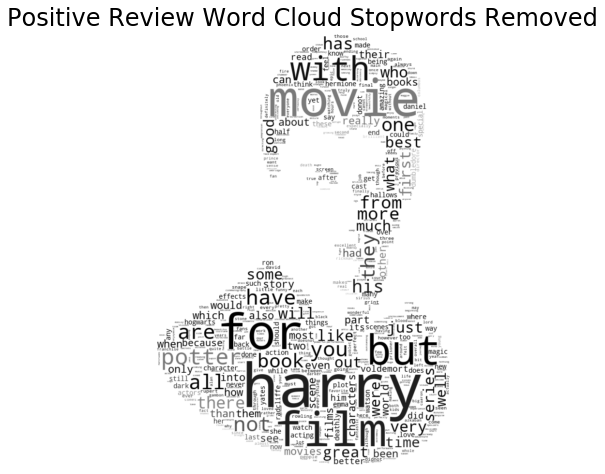

In [349]:
#mask from #mask from: http://clipart-library.com/clip-art/308-3086366_harry-potter-silurysd-harry-potter-clip-art-black.htm
#creating an array of arrays for the mask 
positive_word_cloud = create_word_cloud_with_mask("harry_potter.PNG", stopwords_removed_dict_pos, 750, "Positive Review Word Cloud Stopwords Removed")

In [350]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(stopwords_removed_dict_pos, 20)
eda_reviews_top_words_pos

count    word
19    1542   harry
233   1406   movie
59    1261     for
193   1216    film
63    1107     but
132   1096    with
52     974  potter
6      839     not
149    826     you
161    816     are
169    814    have
35     787     all
166    712    book
134    700    they
23     667     one
41     603     his
28     582    from
163    575    more
73     554     has
378    510   there

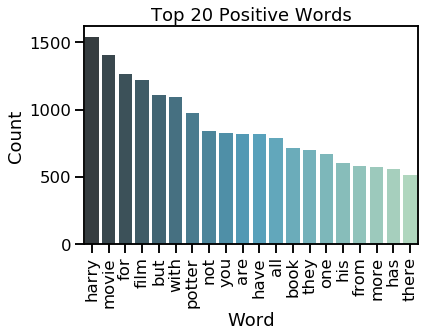

In [351]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

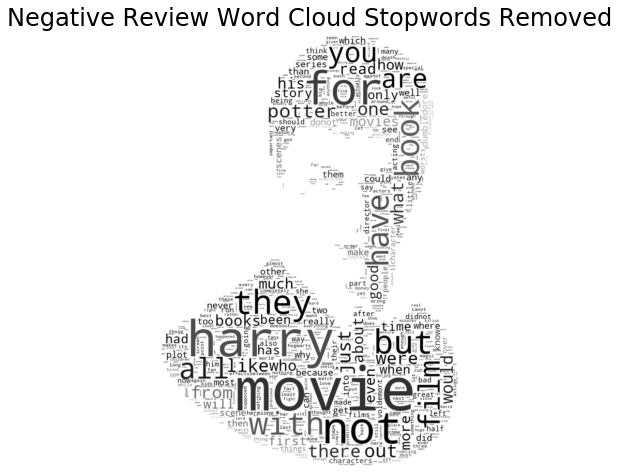

In [353]:
#creating an array of arrays for the mask 
negative_word_cloud = create_word_cloud_with_mask("harry_potter.PNG", stopwords_removed_dict_neg, 750, "Negative Review Word Cloud Stopwords Removed")

In [354]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(stopwords_removed_dict_neg, 20)
eda_reviews_top_words_neg

count    word
43    1842   movie
54    1426   harry
2     1186     for
179   1163     not
65    1132    they
231   1094     but
122   1085    book
82    1083    with
285   1013    have
118    908    film
148    887     all
235    836     you
21     735     are
99     710  potter
414    681    just
40     636     out
269    616    like
232    610   there
63     601     one
387    596    what

In [355]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [356]:
print("***** Positive *****")
total_words_unique_words(stopwords_removed_dict_pos)
print("***** Negative *****")
total_words_unique_words(stopwords_removed_dict_neg)

***** Positive *****
The total number of words is 102842
The total number of unique words is 9079
***** Negative *****
The total number of words is 104231
The total number of unique words is 9204


In [357]:
#Going to remove one more set of stopwords
stopwords = ["movie", "for", "they", "with", "have", "film", "all", "you", "are", "just", "there", "one", "what", "has", 
            "his", "her", "your", "mine", "from", "not"]
negative_df["stopwords_removed"] = negative_df["stopwords_removed"].apply(lambda row: stop_word_removal(stopwords, row))
positive_df["stopwords_removed"] = positive_df["stopwords_removed"].apply(lambda row: stop_word_removal(stopwords, row))

In [358]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, once, upon, time, an...   
1  [pure, magic, this, movie, delight, for, those...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, unf...   
4  [great, journey, the, magic, world, watch, thi...   

                                   stopwords_removed  
0  [magic, comes, life, once, upon, time, long, a...  
1  [pure, magic, delight, those, ages, seen, seve...  
2  [ian, enchantment, trapdoor, imaginary, world,...  
3  [harry, potter, sorcerer, stone, unforgettable...  
4  [great, journey, magic, world, watch, again, b...

In [359]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                   stopwords_removed  
0  [slight, spoilers, kids, only, unfortunately, ...  
1  [effects, laden, excuse, adaptation, many, vie...  
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...  
3  [jrr, dismal, contrived, ripoff, plain, dumb, ...  
4  [spoilers, lot, great, storytelling, story, sp...

In [360]:
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["stopwords_removed"] = positive_df["stopwords_removed"].copy()
pos_viz["stopwords_removed"] = getting_data_ready_for_freq(pos_viz, "stopwords_removed")
stopwords_removed_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "stopwords_removed")

In [361]:
neg_viz = pd.DataFrame()
neg_viz["stopwords_removed"] = negative_df["stopwords_removed"].copy()
neg_viz["stopwords_removed"] = getting_data_ready_for_freq(neg_viz, "stopwords_removed")
stopwords_removed_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "stopwords_removed")

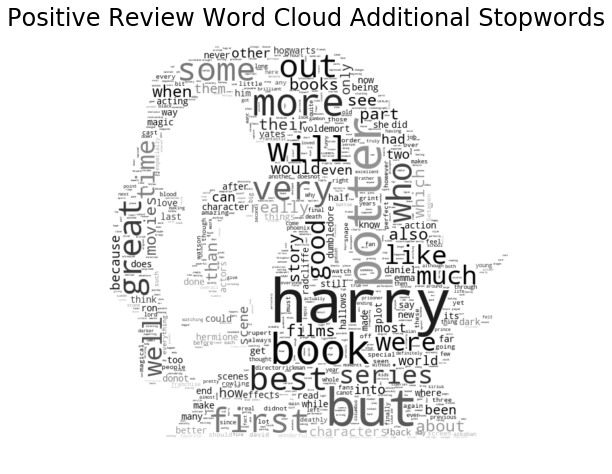

In [363]:
#mask from: https://www.seekpng.com/ipng/u2r5w7e6r5q8e6t4_harry-potter-silhouette-clipart-harry-potter-and-the/
#creating an array of arrays for the mask 
positive_word_cloud = create_word_cloud_with_mask("snape.PNG", stopwords_removed_dict_pos, 750, "Positive Review Word Cloud Additional Stopwords")

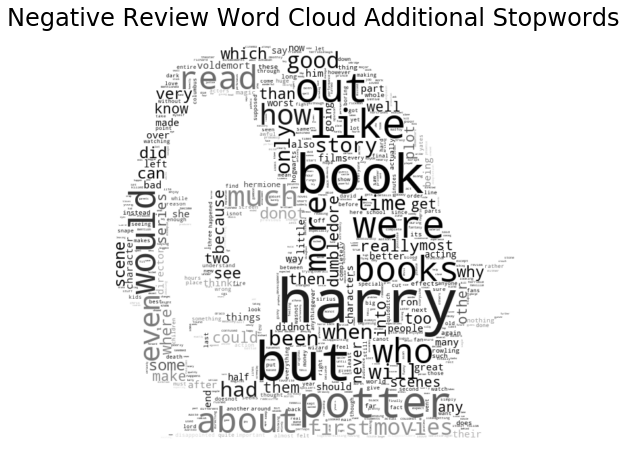

In [364]:
#mask from https://www.seekpng.com/ipng/u2r5w7e6r5q8e6t4_harry-potter-silhouette-clipart-harry-potter-and-the/
#creating an array of arrays for the mask 
negative_word_cloud = create_word_cloud_with_mask("snape.PNG", stopwords_removed_dict_neg, 750, "Negative Review Word Cloud Additional Stopwords")

In [116]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(stopwords_removed_dict_pos, 20)
eda_reviews_top_words_pos

count    word
18    1542   harry
57    1107     but
47     974  potter
152    712    book
149    575    more
132    462    will
420    452   first
181    450    very
19     447     who
98     422     out
161    417   great
216    410    best
519    408  series
101    408    some
365    404    like
551    385    good
148    379    much
123    374    were
5      372    time
81     366    well

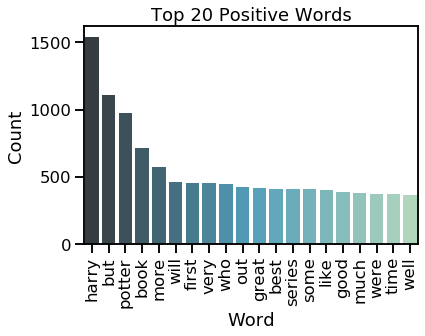

In [117]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

In [118]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(stopwords_removed_dict_neg, 20)
eda_reviews_top_words_neg

count    word
51    1426   harry
219   1094     but
114   1085    book
92     710  potter
38     636     out
255    616    like
10     552    were
43     484   would
103    481   books
48     477   about
125    464     who
207    444    read
85     429    more
57     427    much
171    417     how
84     410    even
47     400    good
211    398  movies
80     393    time
39     393   story

In [119]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [120]:
print("***** Positive *****")
total_words_unique_words(stopwords_removed_dict_pos)
print("***** Negative *****")
total_words_unique_words(stopwords_removed_dict_neg)

***** Positive *****
The total number of words is 89116
The total number of unique words is 9059
***** Negative *****
The total number of words is 89368
The total number of unique words is 9184


In [366]:
#Looking at stemming 
positive_df["stemmed"] = positive_df["stopwords_removed"].apply(lambda row: stem_fun(row))

In [367]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, once, upon, time, an...   
1  [pure, magic, this, movie, delight, for, those...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, unf...   
4  [great, journey, the, magic, world, watch, thi...   

                                   stopwords_removed  \
0  [magic, comes, life, once, upon, time, long, a...   
1  [pure, magic, delight, those, ages, seen, seve...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, sorcerer, stone, unforgettable...   
4  [great, journey, magic, world, watch, again, b...   

                                             stemmed  
0  [magic, come, life, onc, upon, time, long, ago...  
1  [pure, magic, delight, those, age, seen, sever...  
2  [ian, enchant, trapdoor, imaginari, world, tra...  
3  [harri, potter, sorcer, stone, unforgett, star...  
4  [great, journey, magic, world, watch, again, b...

In [368]:
negative_df["stemmed"] = negative_df["stopwords_removed"].apply(lambda row: stem_fun(row))

In [369]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                   stopwords_removed  \
0  [slight, spoilers, kids, only, unfortunately, ...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, plain, dumb, ...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                             stemmed  
0  [slight, spoiler, kid, onli, unfortun, slight,...  
1  [effect, laden, excus, adapt, mani, viewer, ap...  
2  [wow, had, ringwraith, entz, shelob, yeah, hol...  
3  [jrr, dismal, contriv, ripoff, plain, dumb, te...  
4  [spoiler, lot, great, storytel, stori, spoiler...

In [370]:
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["stemmed"] = positive_df["stemmed"].copy()
pos_viz["stemmed"] = getting_data_ready_for_freq(pos_viz, "stemmed")
stemmed_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "stemmed")

In [371]:
neg_viz = pd.DataFrame()
neg_viz["stemmed"] = negative_df["stemmed"].copy()
neg_viz["stemmed"] = getting_data_ready_for_freq(neg_viz, "stemmed")
stemmed_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "stemmed")

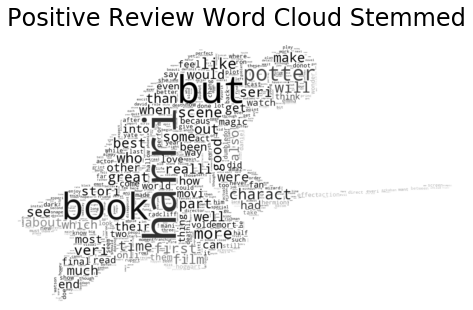

In [372]:
#creating an array of arrays for the mask from https://www.pinclipart.com/pindetail/TxmRT_flying-wizard-by-inexorabletruth-harry-potter-flying-silhouette/
positive_word_cloud = create_word_cloud_with_mask("harry_broom.PNG", stemmed_dict_pos, 750, "Positive Review Word Cloud Stemmed")

In [128]:
#creating an array of arrays for the mask 
negative_word_cloud = create_word_cloud_with_mask("harry_broom.PNG", stopwords_removed_dict_neg, 750, "Negative Review Word Cloud Stemmed")

In [373]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(stemmed_dict_pos, 20)
eda_reviews_top_words_pos

count     word
18    1607    harri
56    1107      but
149   1027     book
46     981   potter
146    575     more
13     490  charact
335    484     like
457    470    scene
129    469     will
5      454     time
401    452    first
177    450     veri
19     447      who
158    423    great
97     423      out
211    410     best
486    408     seri
100    408     some
475    406      see
218    397     part

In [374]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

In [375]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(stemmed_dict_neg, 20)
eda_reviews_top_words_neg

count     word
101   1566     book
50    1464    harri
211   1094      but
91     714   potter
181    694     like
37     636      out
10     552     were
628    549    scene
200    496     read
42     484    would
47     477    about
122    464      who
79     453     time
319    445      see
64     445     make
84     429     more
56     427     much
146    424  charact
165    417      how
83     413     even

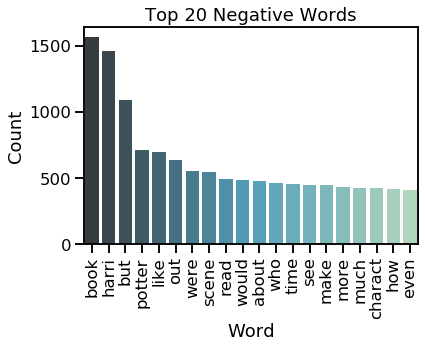

In [376]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [133]:
print("***** Positive *****")
total_words_unique_words(stopwords_removed_dict_pos)
print("***** Negative *****")
total_words_unique_words(stopwords_removed_dict_neg)

***** Positive *****
The total number of words is 89116
The total number of unique words is 6126
***** Negative *****
The total number of words is 89368
The total number of unique words is 6417


In [134]:
#Reducing by sentiment instead of stemming... 

In [377]:
#For my new feature reduction and word removal. I am removing words based on sentiment 
positive_df["sentiment_reduced"] = positive_df.apply(lambda row: pos_neg_words(row["stopwords_removed"]), axis = 1)
negative_df["sentiment_reduced"] = negative_df.apply(lambda row: pos_neg_words(row["stopwords_removed"]), axis = 1)

In [378]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, once, upon, time, an...   
1  [pure, magic, this, movie, delight, for, those...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, unf...   
4  [great, journey, the, magic, world, watch, thi...   

                                   stopwords_removed  \
0  [magic, comes, life, once, upon, time, long, a...   
1  [pure, magic, delight, those, ages, seen, seve...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, sorcerer, stone, unforgettable...   
4  [great, journey, magic, world, watch, again, b...   

                                             stemmed  \
0  [magic, come, life, onc, upon, time, long, ago...   
1  [pure, magic, delight, those, age, seen, sever...   
2  [ian, enchant, trapdoor, imaginari, world, tra...   
3  [harri, potter, sorcer, stone, unforgett, star...   
4  [great, journey, magic, world, watch, again, b...   

                                   sentiment_reduced  
0  [beloved, thanks, novel, well, witch, strange,...  
1  [delight, enchanted, outstanding, special, del...  
2  [trap, passion, like, missing, hard, wishes, l...  
3                                        [fantastic]  
4  [great, amazing, miss, good, friendship, brave...

In [379]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                   stopwords_removed  \
0  [slight, spoilers, kids, only, unfortunately, ...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, plain, dumb, ...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                             stemmed  \
0  [slight, spoiler, kid, onli, unfortun, slight,...   
1  [effect, laden, excus, adapt, mani, viewer, ap...   
2  [wow, had, ringwraith, entz, shelob, yeah, hol...   
3  [jrr, dismal, contriv, ripoff, plain, dumb, te...   
4  [spoiler, lot, great, storytel, stori, spoiler...   

                                   sentiment_reduced  
0  [unfortunately, strange, definitely, trap, dis...  
1  [excuse, applaud, faithfulness, miss, dream, t...  
2  [wow, yeah, greatest, shame, liked, original, ...  
3  [dismal, dumb, terribly, like, problem, terrib...  
4  [great, friends, rant, enthusiastically, creat...

In [382]:
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["sentiment_reduced"] = positive_df["sentiment_reduced"].copy()
pos_viz["sentiment_reduced"] = getting_data_ready_for_freq(pos_viz, "sentiment_reduced")
sentiment_reduced_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "sentiment_reduced")

In [383]:
neg_viz = pd.DataFrame()
neg_viz["sentiment_reduced"] = negative_df["sentiment_reduced"].copy()
neg_viz["sentiment_reduced"] = getting_data_ready_for_freq(neg_viz, "sentiment_reduced")
sentiment_reduced_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "sentiment_reduced")

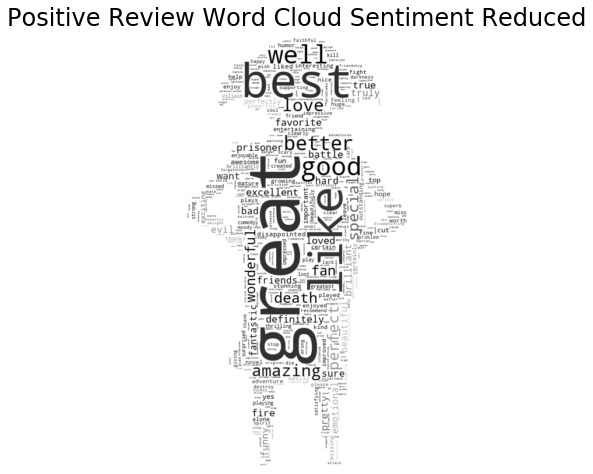

In [384]:
#creating an array of arrays for the mask from http://getdrawings.com/hogwarts-silhouette-clipart
positive_word_cloud = create_word_cloud_with_mask("dobby.PNG", sentiment_reduced_dict_pos, 750, "Positive Review Word Cloud Sentiment Reduced")

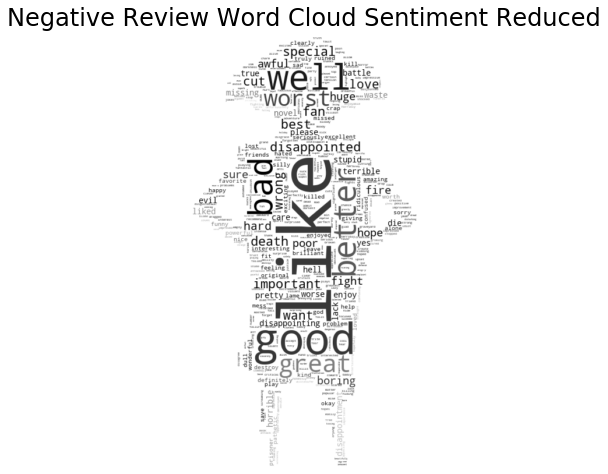

In [385]:
#mask from http://getdrawings.com/hogwarts-silhouette-clipart
#creating an array of arrays for the mask 
negative_word_cloud = create_word_cloud_with_mask("dobby.PNG", sentiment_reduced_dict_neg, 750, "Negative Review Word Cloud Sentiment Reduced")

In [386]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(sentiment_reduced_dict_pos, 20)
eda_reviews_top_words_pos

count        word
12     417       great
25     410        best
45     404        like
79     385        good
3      366        well
216    220      better
43     167        love
77     147     amazing
11     140     special
6      125     perfect
83     111       death
197    105         fan
29      98   wonderful
110     95  definitely
319     94        fire
30      92   excellent
114     92   brilliant
174     90    favorite
17      89        true
254     89      battle

In [387]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

In [388]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(sentiment_reduced_dict_neg, 20)
eda_reviews_top_words_neg

count          word
47     616          like
5      400          good
46     247          well
57     212           bad
40     195        better
64     193         great
50     165         worst
4      127  disappointed
390    126     important
54     124          best
59     122       special
544    122         death
178    120           fan
7      112           cut
132    108          want
83     104          love
41     101         wrong
12      89          hard
386     79          fire
95      79        boring

In [389]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [390]:
print("***** Positive *****")
total_words_unique_words(sentiment_reduced_dict_pos)
print("***** Negative *****")
total_words_unique_words(sentiment_reduced_dict_neg)

***** Positive *****
The total number of words is 13685
The total number of unique words is 1642
***** Negative *****
The total number of words is 13044
The total number of unique words is 1627


In [391]:
#Exploring Bigrams 
positive_df["bigrams"] = positive_df["review_tokenize"].apply(lambda row: creating_ngrams(row, 2))
negative_df["bigrams"] = negative_df["review_tokenize"].apply(lambda row: creating_ngrams(row, 2))

In [392]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, once, upon, time, an...   
1  [pure, magic, this, movie, delight, for, those...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, unf...   
4  [great, journey, the, magic, world, watch, thi...   

                                   stopwords_removed  \
0  [magic, comes, life, once, upon, time, long, a...   
1  [pure, magic, delight, those, ages, seen, seve...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, sorcerer, stone, unforgettable...   
4  [great, journey, magic, world, watch, again, b...   

                                             stemmed  \
0  [magic, come, life, onc, upon, time, long, ago...   
1  [pure, magic, delight, those, age, seen, sever...   
2  [ian, enchant, trapdoor, imaginari, world, tra...   
3  [harri, potter, sorcer, stone, unforgett, star...   
4  [great, journey, magic, world, watch, again, b...   

                                   sentiment_reduced  \
0  [beloved, thanks, novel, well, witch, strange,...   
1  [delight, enchanted, outstanding, special, del...   
2  [trap, passion, like, missing, hard, wishes, l...   
3                                        [fantastic]   
4  [great, amazing, miss, good, friendship, brave...   

                                             bigrams  
0  [the_magic, magic_comes, comes_life, life_once...  
1  [pure_magic, magic_this, this_movie, movie_del...  
2  [ian_enchantment, enchantment_trapdoor, trapdo...  
3  [harry_potter, potter_and, and_the, the_sorcer...  
4  [great_journey, journey_the, the_magic, magic_...

In [393]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                   stopwords_removed  \
0  [slight, spoilers, kids, only, unfortunately, ...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, plain, dumb, ...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                             stemmed  \
0  [slight, spoiler, kid, onli, unfortun, slight,...   
1  [effect, laden, excus, adapt, mani, viewer, ap...   
2  [wow, had, ringwraith, entz, shelob, yeah, hol...   
3  [jrr, dismal, contriv, ripoff, plain, dumb, te...   
4  [spoiler, lot, great, storytel, stori, spoiler...   

                                   sentiment_reduced  \
0  [unfortunately, strange, definitely, trap, dis...   
1  [excuse, applaud, faithfulness, miss, dream, t...   
2  [wow, yeah, greatest, shame, liked, original, ...   
3  [dismal, dumb, terribly, like, problem, terrib...   
4  [great, friends, rant, enthusiastically, creat...   

                                             bigrams  
0  [slight_spoilers, spoilers_for, for_kids, kids...  
1  [effects_laden, laden_excuse, excuse_adaptatio...  
2  [wow_had, had_ringwraiths, ringwraiths_entz, e...  
3  [jrr_dismal, dismal_contrived, contrived_ripof...  
4  [spoilers_lot, lot_great, great_storytelling, ...

In [394]:
#Creating bigrams with the stopwords_removed df 
positive_df["bigrams_stopwords_removed"] = positive_df["stopwords_removed"].apply(lambda row: creating_ngrams(row, 2))
negative_df["bigrams_stopwords_removed"] = negative_df["stopwords_removed"].apply(lambda row: creating_ngrams(row, 2))

In [395]:
#repeating the process for trigrams only for the review_tokenize 
positive_df["fourgrams"] = positive_df["review_tokenize"].apply(lambda row: creating_ngrams(row, 4))
negative_df["fourgrams"] = negative_df["review_tokenize"].apply(lambda row: creating_ngrams(row, 4))

In [396]:
positive_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, once, upon, time, an...   
1  [pure, magic, this, movie, delight, for, those...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, unf...   
4  [great, journey, the, magic, world, watch, thi...   

                                   stopwords_removed  \
0  [magic, comes, life, once, upon, time, long, a...   
1  [pure, magic, delight, those, ages, seen, seve...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, sorcerer, stone, unforgettable...   
4  [great, journey, magic, world, watch, again, b...   

                                             stemmed  \
0  [magic, come, life, onc, upon, time, long, ago...   
1  [pure, magic, delight, those, age, seen, sever...   
2  [ian, enchant, trapdoor, imaginari, world, tra...   
3  [harri, potter, sorcer, stone, unforgett, star...   
4  [great, journey, magic, world, watch, again, b...   

                                   sentiment_reduced  \
0  [beloved, thanks, novel, well, witch, strange,...   
1  [delight, enchanted, outstanding, special, del...   
2  [trap, passion, like, missing, hard, wishes, l...   
3                                        [fantastic]   
4  [great, amazing, miss, good, friendship, brave...   

                                             bigrams  \
0  [the_magic, magic_comes, comes_life, life_once...   
1  [pure_magic, magic_this, this_movie, movie_del...   
2  [ian_enchantment, enchantment_trapdoor, trapdo...   
3  [harry_potter, potter_and, and_the, the_sorcer...   
4  [great_journey, journey_the, the_magic, magic_...   

                           bigrams_stopwords_removed  \
0  [magic_comes, comes_life, life_once, once_upon...   
1  [pure_magic, magic_delight, delight_those, tho...   
2  [ian_enchantment, enchantment_trapdoor, trapdo...   
3  [harry_potter, potter_sorcerer, sorcerer_stone...   
4  [great_journey, journey_magic, magic_world, wo...   

                                           fourgrams  
0  [the_magic_comes_life, magic_comes_life_once, ...  
1  [pure_magic_this_movie, magic_this_movie_delig...  
2  [ian_enchantment_trapdoor_imaginary, enchantme...  
3  [harry_potter_and_the, potter_and_the_sorcerer...  
4  [great_journey_the_magic, journey_the_magic_wo...

In [397]:
negative_df.head()

rating                                             review  \
0      1   For Kids Only, Unfortunately\n==  *SLIGHT SPO...   
1      1   An effects-laden excuse of an adaptation\n== ...   
2      1   Hollywood's greatest shame.\n== At first I li...   
3      1   Dismal, Contrived, Ripoff and just plain dumb...   
4      1   Great storytelling, no story\n==  SPOILERS Be...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately s...     0.010811   
1   effects laden excuse adaptation many viewers ...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010187   
3   jrr dismal contrived ripoff and just plain du...     0.005952   
4   spoilers lot great storytelling story spoiler...     0.003333   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                   stopwords_removed  \
0  [slight, spoilers, kids, only, unfortunately, ...   
1  [effects, laden, excuse, adaptation, many, vie...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, plain, dumb, ...   
4  [spoilers, lot, great, storytelling, story, sp...   

                                             stemmed  \
0  [slight, spoiler, kid, onli, unfortun, slight,...   
1  [effect, laden, excus, adapt, mani, viewer, ap...   
2  [wow, had, ringwraith, entz, shelob, yeah, hol...   
3  [jrr, dismal, contriv, ripoff, plain, dumb, te...   
4  [spoiler, lot, great, storytel, stori, spoiler...   

                                   sentiment_reduced  \
0  [unfortunately, strange, definitely, trap, dis...   
1  [excuse, applaud, faithfulness, miss, dream, t...   
2  [wow, yeah, greatest, shame, liked, original, ...   
3  [dismal, dumb, terribly, like, problem, terrib...   
4  [great, friends, rant, enthusiastically, creat...   

                                             bigrams  \
0  [slight_spoilers, spoilers_for, for_kids, kids...   
1  [effects_laden, laden_excuse, excuse_adaptatio...   
2  [wow_had, had_ringwraiths, ringwraiths_entz, e...   
3  [jrr_dismal, dismal_contrived, contrived_ripof...   
4  [spoilers_lot, lot_great, great_storytelling, ...   

                           bigrams_stopwords_removed  \
0  [slight_spoilers, spoilers_kids, kids_only, on...   
1  [effects_laden, laden_excuse, excuse_adaptatio...   
2  [wow_had, had_ringwraiths, ringwraiths_entz, e...   
3  [jrr_dismal, dismal_contrived, contrived_ripof...   
4  [spoilers_lot, lot_great, great_storytelling, ...   

                                           fourgrams  
0  [slight_spoilers_for_kids, spoilers_for_kids_o...  
1  [effects_laden_excuse_adaptation, laden_excuse...  
2  [wow_had_ringwraiths_entz, had_ringwraiths_ent...  
3  [jrr_dismal_contrived_ripoff, dismal_contrived...  
4  [spoilers_lot_great_storytelling, lot_great_st...

In [399]:
#Visualizing bigrams 
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["bigrams"] = positive_df["bigrams"].copy()
pos_viz["bigrams"] = getting_data_ready_for_freq(pos_viz, "bigrams")
bigrams_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "bigrams")

In [400]:
neg_viz = pd.DataFrame()
neg_viz["bigrams"] = negative_df["bigrams"].copy()
neg_viz["bigrams"] = getting_data_ready_for_freq(neg_viz, "bigrams")
bigrams_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "bigrams")

In [402]:
#creating an array of arrays for the mask from http://getdrawings.com/hogwarts-silhouette-clipart
positive_word_cloud = create_word_cloud_with_mask("harry_potter.PNG", bigrams_dict_pos, 750, "Positive Review Word Cloud Bigrams")

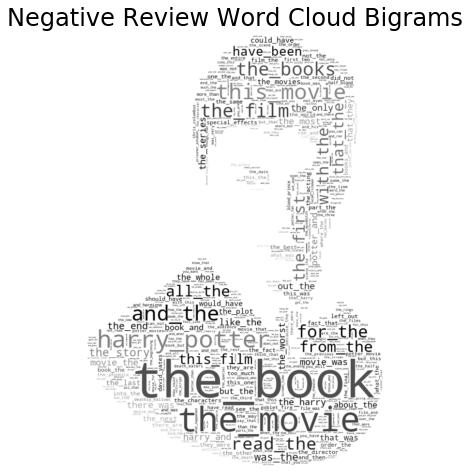

In [403]:
#creating an array of arrays for the mask 
negative_word_cloud = create_word_cloud_with_mask("harry_potter.PNG", bigrams_dict_neg, 750, "Negative Review Word Cloud Bigrams")

In [404]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(bigrams_dict_pos, 20)
eda_reviews_top_words_pos

count          word
77      802  harry_potter
79      598       and_the
657     500     the_movie
1790    492      the_book
524     449      the_film
746     358    this_movie
88      337       for_the
839     331     the_first
404     286      the_best
65      263      from_the
413     250     this_film
529     239      with_the
78      238    potter_and
1690    232     the_books
1111    219       all_the
1075    212    the_series
596     196      that_the
329     179     the_story
30      164       one_the
4468    144      read_the

In [405]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(bigrams_dict_neg, 20)
eda_reviews_top_words_neg

count          word
164     777      the_book
221     704     the_movie
132     633  harry_potter
102     513    this_movie
127     468       and_the
929     355     the_books
171     347      the_film
341     319      read_the
280     306       for_the
455     263     the_first
1764    258      with_the
238     245      from_the
184     240      that_the
936     238       all_the
159     235     this_film
2861    203     have_been
50      191     the_story
1020    178       was_the
67      146       the_end
669     136     movie_was

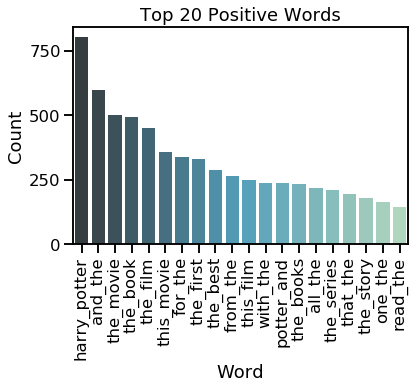

In [160]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

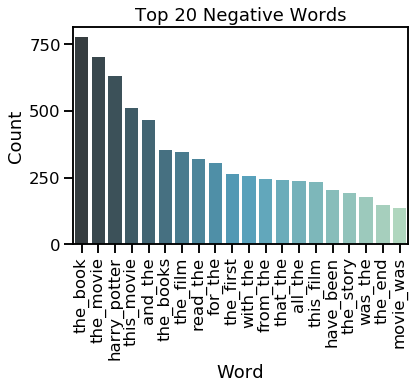

In [161]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [406]:
#Visualizing bigrams 
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["bigrams_stopwords_removed"] = positive_df["bigrams_stopwords_removed"].copy()
pos_viz["bigrams_stopwords_removed"] = getting_data_ready_for_freq(pos_viz, "bigrams_stopwords_removed")
bigrams_stopwords_removed_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "bigrams_stopwords_removed")

In [407]:
neg_viz = pd.DataFrame()
neg_viz["bigrams_stopwords_removed"] = negative_df["bigrams_stopwords_removed"].copy()
neg_viz["bigrams_stopwords_removed"] = getting_data_ready_for_freq(neg_viz, "bigrams_stopwords_removed")
bigrams_stopwords_removed_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "bigrams_stopwords_removed")

In [408]:
positive_word_cloud = create_word_cloud_with_mask("harry_broom.PNG", bigrams_stopwords_removed_dict_pos, 750, "Positive Review Word Cloud Bigrams Stopwords Removed")

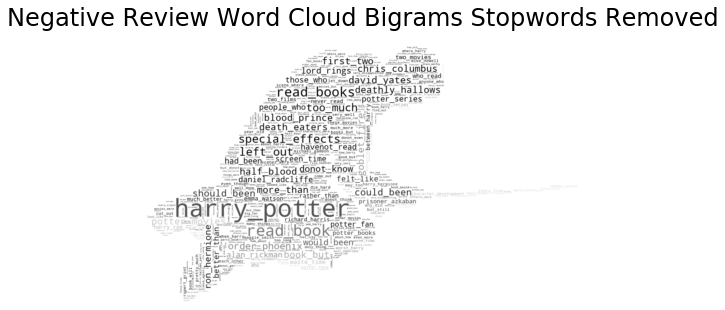

In [409]:
negative_word_cloud = create_word_cloud_with_mask("harry_broom.PNG", bigrams_stopwords_removed_dict_neg, 750, "Negative Review Word Cloud Bigrams Stopwords Removed")

In [411]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(bigrams_stopwords_removed_dict_pos, 20)
eda_reviews_top_words_pos

count              word
54       802      harry_potter
3342     144   deathly_hallows
73       114  daniel_radcliffe
351      108       emma_watson
347      100      rupert_grint
4417      99     order_phoenix
250       97   special_effects
11318     89       david_yates
433       87      alan_rickman
13280     86        half_blood
13281     85      blood_prince
4415      78       goblet_fire
18597     78      hallows_part
5077      76        read_books
4360      73  prisoner_azkaban
194       72         more_than
3570      69         read_book
20294     66    potter_deathly
5302      64         first_two
2399      57     potter_series

In [412]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(bigrams_stopwords_removed_dict_neg, 20)
eda_reviews_top_words_neg

count             word
103      633     harry_potter
1568     185        read_book
725      126       read_books
420       93  special_effects
5856      92         left_out
755       79         too_much
5829      63    order_phoenix
14747     63      david_yates
6827      61      goblet_fire
5195      60        first_two
14113     57       half_blood
137       56        more_than
14114     55     blood_prince
14986     53  deathly_hallows
293       52   chris_columbus
1891      52         book_but
9037      50     death_eaters
2286      50       could_been
5180      49    potter_movies
4965      49      should_been

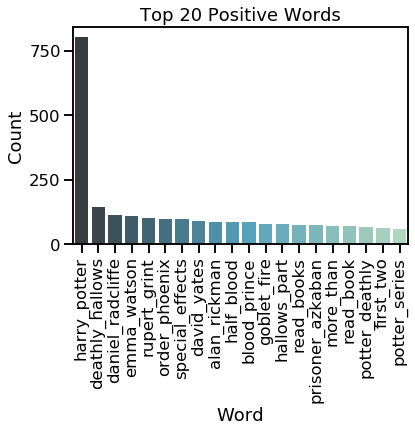

In [413]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

In [414]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [415]:
#Looking at the four grams 
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["fourgrams"] = positive_df["fourgrams"].copy()
pos_viz["fourgrams"] = getting_data_ready_for_freq(pos_viz, "fourgrams")
fourgrams_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "fourgrams")

In [416]:
neg_viz = pd.DataFrame()
neg_viz["fourgrams"] = negative_df["fourgrams"].copy()
neg_viz["fourgrams"] = getting_data_ready_for_freq(neg_viz, "fourgrams")
fourgrams_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "fourgrams")

In [417]:
positive_word_cloud = create_word_cloud_with_mask("sorting_hat.PNG", fourgrams_dict_pos, 75, "Positive Review Word Cloud Fourgrams")

In [418]:
negative_word_cloud = create_word_cloud_with_mask("sorting_hat.PNG", fourgrams_dict_neg, 75, "Negative Review Word Cloud Fourgrams")

In [419]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(fourgrams_dict_pos, 20)
eda_reviews_top_words_pos

count                        word
79       209        harry_potter_and_the
32802     65     and_the_deathly_hallows
32801     64      potter_and_the_deathly
32803     61    the_deathly_hallows_part
23482     45       the_half_blood_prince
15095     42       the_order_the_phoenix
3517      39     the_harry_potter_series
8949      28     potter_and_the_prisoner
8950      28    and_the_prisoner_azkaban
5092      26       the_best_harry_potter
23481     25          and_the_half_blood
27566     25      harry_ron_and_hermione
17397     23        potter_and_the_order
17398     22           and_the_order_the
23480     22         potter_and_the_half
81        21      and_the_sorcerer_stone
7986      21         the_first_two_films
80        20     potter_and_the_sorcerer
11238     19  the_harry_potter_franchise
4117      19      emma_watson_and_rupert

In [420]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(fourgrams_dict_neg, 20)
eda_reviews_top_words_neg

count                     word
1707      89     harry_potter_and_the
26092     36    the_half_blood_prince
8710      33    the_order_the_phoenix
303       29  the_harry_potter_series
12209     25       have_read_the_book
2227      24        read_the_book_and
7765      23  the_harry_potter_movies
8215      21      the_first_two_films
354       20       the_lord_the_rings
31311     19   the_harry_potter_books
1000      19       read_the_books_and
8152      19     you_havenot_read_the
2346      18     never_read_the_books
8153      17    havenot_read_the_book
8967      16        the_fact_that_the
999       16   havenot_read_the_books
19605     16        and_the_order_the
7723      16     the_first_two_movies
8136      15        you_read_the_book
2788      14      have_read_the_books

In [421]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

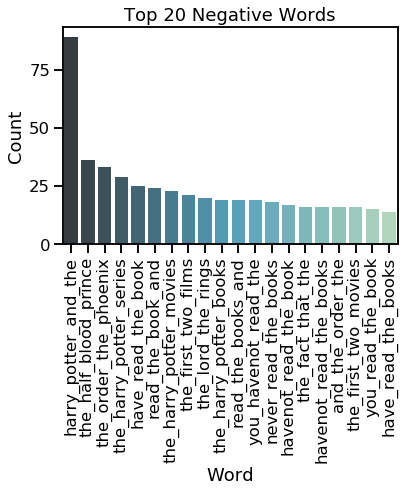

In [422]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [423]:
#Adding a label to the positive reviews and negative reviews 
positive_df["label"] = "pos"
negative_df["label"] = "neg"

In [424]:
#Combining the positive and negative df together 
combined_df = pd.concat([positive_df, negative_df])

In [425]:
combined_df.head()

rating                                             review  \
0     10   The Magic Comes To Life!\n== Once upon a time...   
1     10   Pure Magic\n== This movie is a delight for th...   
2     10   Enchantment, Trapdoor to Imaginary World.\n==...   
3     10   Harry Potter and the Sorcerer's Stone\n== 10/...   
4     10   Great Journey to the Magic World\n== I watch ...   

                                          new_review  percent_cap  \
0   the magic comes life once upon time and not t...     0.000000   
1   pure magic this movie delight for those all a...     0.000000   
2   ian enchantment trapdoor imaginary world this...     0.002242   
3   harry potter and the sorcerer stone unforgett...     0.000000   
4   great journey the magic world watch this movi...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, once, upon, time, an...   
1  [pure, magic, this, movie, delight, for, those...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, unf...   
4  [great, journey, the, magic, world, watch, thi...   

                                   stopwords_removed  \
0  [magic, comes, life, once, upon, time, long, a...   
1  [pure, magic, delight, those, ages, seen, seve...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, sorcerer, stone, unforgettable...   
4  [great, journey, magic, world, watch, again, b...   

                                             stemmed  \
0  [magic, come, life, onc, upon, time, long, ago...   
1  [pure, magic, delight, those, age, seen, sever...   
2  [ian, enchant, trapdoor, imaginari, world, tra...   
3  [harri, potter, sorcer, stone, unforgett, star...   
4  [great, journey, magic, world, watch, again, b...   

                                   sentiment_reduced  \
0  [beloved, thanks, novel, well, witch, strange,...   
1  [delight, enchanted, outstanding, special, del...   
2  [trap, passion, like, missing, hard, wishes, l...   
3                                        [fantastic]   
4  [great, amazing, miss, good, friendship, brave...   

                                             bigrams  \
0  [the_magic, magic_comes, comes_life, life_once...   
1  [pure_magic, magic_this, this_movie, movie_del...   
2  [ian_enchantment, enchantment_trapdoor, trapdo...   
3  [harry_potter, potter_and, and_the, the_sorcer...   
4  [great_journey, journey_the, the_magic, magic_...   

                           bigrams_stopwords_removed  \
0  [magic_comes, comes_life, life_once, once_upon...   
1  [pure_magic, magic_delight, delight_those, tho...   
2  [ian_enchantment, enchantment_trapdoor, trapdo...   
3  [harry_potter, potter_sorcerer, sorcerer_stone...   
4  [great_journey, journey_magic, magic_world, wo...   

                                           fourgrams label  
0  [the_magic_comes_life, magic_comes_life_once, ...   pos  
1  [pure_magic_this_movie, magic_this_movie_delig...   pos  
2  [ian_enchantment_trapdoor_imaginary, enchantme...   pos  
3  [harry_potter_and_the, potter_and_the_sorcerer...   pos  
4  [great_journey_the_magic, journey_the_magic_wo...   pos

In [426]:
combined_df.tail()

rating                                             review  \
487      3   Deathly Disappointing\n== Time for your OWL m...   
488      3   Nothing but disappointing.\n== It's been 3 ye...   
489      3   A middling series ends on a low-point.\n== I'...   
490      3   OK but not I'm not Wowed!\n== Harry Potter an...   
491      3   Its OK, not great.\n== Well I watched this la...   

                                            new_review  percent_cap  \
487   owl rofle omg deathly disappointing time for ...     0.005435   
488   nothing but disappointing been years now sinc...     0.000000   
489   middling series ends low point will admit tha...     0.000000   
490   but not not wowed harry potter and the deathl...     0.000000   
491   dvd its not great well watched this last nigh...     0.006944   

                                       review_tokenize  \
487  [owl, rofle, omg, deathly, disappointing, time...   
488  [nothing, but, disappointing, been, years, now...   
489  [middling, series, ends, low, point, will, adm...   
490  [but, not, not, wowed, harry, potter, and, the...   
491  [dvd, its, not, great, well, watched, this, la...   

                                     stopwords_removed  \
487  [owl, rofle, omg, deathly, disappointing, time...   
488  [nothing, but, disappointing, been, years, now...   
489  [middling, series, ends, low, point, will, adm...   
490  [but, wowed, harry, potter, deathly, hallows, ...   
491  [dvd, its, great, well, watched, last, night, ...   

                                               stemmed  \
487  [owl, rofl, omg, deathli, disappoint, time, ow...   
488  [noth, but, disappoint, been, year, now, sinc,...   
489  [middl, seri, end, low, point, will, admit, ne...   
490  [but, wow, harri, potter, deathli, hallow, par...   
491  [dvd, it, great, well, watch, last, night, lef...   

                                     sentiment_reduced  \
487  [disappointing, dreadful, poor, better, luck, ...   
488  [disappointing, strong, mess, ironic, shocked,...   
489  [low, admit, liked, emotional, improvement, li...   
490  [wowed, improvement, great, horrible, good, gr...   
491  [great, well, feeling, like, well, bothered, h...   

                                               bigrams  \
487  [owl_rofle, rofle_omg, omg_deathly, deathly_di...   
488  [nothing_but, but_disappointing, disappointing...   
489  [middling_series, series_ends, ends_low, low_p...   
490  [but_not, not_not, not_wowed, wowed_harry, har...   
491  [dvd_its, its_not, not_great, great_well, well...   

                             bigrams_stopwords_removed  \
487  [owl_rofle, rofle_omg, omg_deathly, deathly_di...   
488  [nothing_but, but_disappointing, disappointing...   
489  [middling_series, series_ends, ends_low, low_p...   
490  [but_wowed, wowed_harry, harry_potter, potter_...   
491  [dvd_its, its_great, great_well, well_watched,...   

                                             fourgrams label  
487  [owl_rofle_omg_deathly, rofle_omg_deathly_disa...   neg  
488  [nothing_but_disappointing_been, but_disappoin...   neg  
489  [middling_series_ends_low, series_ends_low_poi...   neg  
490  [but_not_not_wowed, not_not_wowed_harry, not_w...   neg  
491  [dvd_its_not_great, its_not_great_well, not_gr...   neg

In [427]:
#I need to reset the index 
combined_df.reset_index(inplace = True)

In [183]:
#Ready to see if I can predict the review sentiment 
no_stopwords_df = pd.DataFrame() 
tokenized_df = pd.DataFrame()
stemmed_df = pd.DataFrame()
sentiment_reduced_df = pd.DataFrame()
no_stopwords_df["review"] = combined_df["stopwords_removed"].copy()
tokenized_df["review"] = combined_df["review_tokenize"].copy()
stemmed_df["review"] = combined_df["stemmed"].copy()
sentiment_reduced_df["review"] = combined_df["sentiment_reduced"].copy()

In [184]:
no_stopwords_df["label"] = combined_df["label"]
tokenized_df["label"] = combined_df["label"]
stemmed_df["label"] = combined_df["label"]
sentiment_reduced_df["label"] = combined_df["label"]

In [185]:
no_stopwords_df.head()

review label
0  [magic, comes, life, once, upon, time, long, a...   pos
1  [pure, magic, delight, those, ages, seen, seve...   pos
2  [ian, enchantment, trapdoor, imaginary, world,...   pos
3  [harry, potter, sorcerer, stone, unforgettable...   pos
4  [great, journey, magic, world, watch, again, b...   pos

In [186]:
tokenized_df.head()

review label
0  [the, magic, comes, life, once, upon, time, an...   pos
1  [pure, magic, this, movie, delight, for, those...   pos
2  [ian, enchantment, trapdoor, imaginary, world,...   pos
3  [harry, potter, and, the, sorcerer, stone, unf...   pos
4  [great, journey, the, magic, world, watch, thi...   pos

In [187]:
stemmed_df.head()

review label
0  [magic, come, life, onc, upon, time, long, ago...   pos
1  [pure, magic, delight, those, age, seen, sever...   pos
2  [ian, enchant, trapdoor, imaginari, world, tra...   pos
3  [harri, potter, sorcer, stone, unforgett, star...   pos
4  [great, journey, magic, world, watch, again, b...   pos

In [188]:
sentiment_reduced_df.head()

review label
0  [beloved, thanks, novel, well, witch, strange,...   pos
1  [delight, enchanted, outstanding, special, del...   pos
2  [trap, passion, like, missing, hard, wishes, l...   pos
3                                        [fantastic]   pos
4  [great, amazing, miss, good, friendship, brave...   pos

In [189]:
#Now I am going to create my bag of words for the tokenized reviews 
#First, I must remove the labels that I just added... 
tokenized_label = tokenized_df["label"]
tokenized_df.drop("label", axis = 1, inplace = True)
no_stopwords_label = no_stopwords_df["label"]
no_stopwords_df.drop("label", axis = 1, inplace = True)
stemmed_label = stemmed_df["label"]
stemmed_df.drop("label", axis = 1, inplace = True)
sentiment_label = sentiment_reduced_df["label"]
sentiment_reduced_df.drop("label", axis = 1, inplace = True)

tokenized_bow = bag_of_words(tokenized_df, "review")
no_stopwords_bow = bag_of_words(no_stopwords_df, "review")
stemmed_bow = bag_of_words(stemmed_df, "review")
sentiment_reduced_bow = bag_of_words(sentiment_reduced_df, "review")

In [190]:
tokenized_bow[3]

Counter({'harry': 1,
         'potter': 1,
         'and': 3,
         'the': 4,
         'sorcerer': 1,
         'stone': 1,
         'unforgettable': 1,
         'start': 1,
         'fantastic': 1,
         'film': 1,
         'series': 1,
         'career': 1,
         'impeccable': 1,
         'emma': 1,
         'watson': 1,
         'other': 1,
         'kids': 1})

In [191]:
no_stopwords_bow[3]

Counter({'harry': 1,
         'potter': 1,
         'sorcerer': 1,
         'stone': 1,
         'unforgettable': 1,
         'start': 1,
         'fantastic': 1,
         'series': 1,
         'career': 1,
         'impeccable': 1,
         'emma': 1,
         'watson': 1,
         'other': 1,
         'kids': 1})

In [192]:
stemmed_bow[3]

Counter({'harri': 1,
         'potter': 1,
         'sorcer': 1,
         'stone': 1,
         'unforgett': 1,
         'start': 1,
         'fantast': 1,
         'seri': 1,
         'career': 1,
         'impecc': 1,
         'emma': 1,
         'watson': 1,
         'other': 1,
         'kid': 1})

In [193]:
sentiment_reduced_bow[3]

Counter({'fantastic': 1})

In [194]:
tokenized_df = bow_to_df(tokenized_bow)
no_stopwords_df = bow_to_df(no_stopwords_bow)
stemmed_df = bow_to_df(stemmed_bow)
sentiment_reduced_df = bow_to_df(sentiment_reduced_bow)

In [195]:
tokenized_df.head()

the  magic  comes  life  once  upon  time  and  not  that  ...  peaks  \
0   59      8      1     5     1     2     2   47    5    18  ...      0   
1    8      2      0     0     0     0     1    6    0     0  ...      0   
2   30      0      0     5     0     0     1    7    1     2  ...      0   
3    4      0      0     0     0     0     0    3    0     0  ...      0   
4    5      2      0     0     0     0     0    1    1     0  ...      0   

   payoffs  footnotes  wowed  lashed  sellout  wash  hairs  tingling  lump  
0        0          0      0       0        0     0      0         0     0  
1        0          0      0       0        0     0      0         0     0  
2        0          0      0       0        0     0      0         0     0  
3        0          0      0       0        0     0      0         0     0  
4        0          0      0       0        0     0      0         0     0  

[5 rows x 12982 columns]

In [196]:
no_stopwords_df.head()

magic  comes  life  once  upon  time  long  ago  vivid  fertile  ...  \
0      8      1     5     1     2     2     4    1      1        1  ...   
1      2      0     0     0     0     1     0    0      0        0  ...   
2      0      0     5     0     0     1     0    0      0        0  ...   
3      0      0     0     0     0     0     0    0      0        0  ...   
4      2      0     0     0     0     0     0    0      0        0  ...   

   peaks  payoffs  footnotes  wowed  lashed  sellout  wash  hairs  tingling  \
0      0        0          0      0       0        0     0      0         0   
1      0        0          0      0       0        0     0      0         0   
2      0        0          0      0       0        0     0      0         0   
3      0        0          0      0       0        0     0      0         0   
4      0        0          0      0       0        0     0      0         0   

   lump  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 12957 columns]

In [197]:
stemmed_df.head()

magic  come  life  onc  upon  time  long  ago  vivid  fertil  ...  \
0      8     1     5    1     2     4     4    1      1       1  ...   
1      2     0     0    0     0     2     0    0      0       0  ...   
2      0     0     5    0     0     2     0    0      0       0  ...   
3      0     0     0    0     0     0     0    0      0       0  ...   
4      2     0     0    0     0     0     0    0      0       0  ...   

   batchmat  dehuman  jubil  voledomort  microsoft  powerpoint  waysid  lash  \
0         0        0      0           0          0           0       0     0   
1         0        0      0           0          0           0       0     0   
2         0        0      0           0          0           0       0     0   
3         0        0      0           0          0           0       0     0   
4         0        0      0           0          0           0       0     0   

   sellout  tingl  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0  

[5 rows x 8589 columns]

In [198]:
sentiment_reduced_df.head()

beloved  thanks  novel  well  witch  strange  perfect  gift  alive  forget  \
0        2       1      2     3      1        1        3     2      1       2   
1        0       0      0     0      0        0        0     0      0       0   
2        0       0      1     1      0        0        0     0      0       0   
3        0       0      0     0      0        0        0     0      0       0   
4        0       0      0     0      0        0        0     0      0       0   

   ...  remorse  bitch  innovation  carelessly  elation  ecstasy  \
0  ...        0      0           0           0        0        0   
1  ...        0      0           0           0        0        0   
2  ...        0      0           0           0        0        0   
3  ...        0      0           0           0        0        0   
4  ...        0      0           0           0        0        0   

   impressively  dehumanized  mourning  wowed  
0             0            0         0      0  
1             0            0         0      0  
2             0            0         0      0  
3             0            0         0      0  
4             0            0         0      0  

[5 rows x 2160 columns]

In [199]:
#normalizing the dfs
#Now, I need to normalize the dataframe 
tokenized_df = normalize_df(tokenized_df)

In [200]:
tokenized_df.head()

the     magic     comes      life      once      upon      time  \
0  0.073201  0.009926  0.001241  0.006203  0.001241  0.002481  0.002481   
1  0.097561  0.024390  0.000000  0.000000  0.000000  0.000000  0.012195   
2  0.083333  0.000000  0.000000  0.013889  0.000000  0.000000  0.002778   
3  0.181818  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.080645  0.032258  0.000000  0.000000  0.000000  0.000000  0.000000   

        and       not      that  ...  peaks  payoffs  footnotes  wowed  \
0  0.058313  0.006203  0.022333  ...    0.0      0.0        0.0    0.0   
1  0.073171  0.000000  0.000000  ...    0.0      0.0        0.0    0.0   
2  0.019444  0.002778  0.005556  ...    0.0      0.0        0.0    0.0   
3  0.136364  0.000000  0.000000  ...    0.0      0.0        0.0    0.0   
4  0.016129  0.016129  0.000000  ...    0.0      0.0        0.0    0.0   

   lashed  sellout  wash  hairs  tingling  lump  
0     0.0      0.0   0.0    0.0       0.0   0.0  
1     0.0      0.0   0.0    0.0       0.0   0.0  
2     0.0      0.0   0.0    0.0       0.0   0.0  
3     0.0      0.0   0.0    0.0       0.0   0.0  
4     0.0      0.0   0.0    0.0       0.0   0.0  

[5 rows x 12982 columns]

In [428]:
tokenized_df.shape

(984, 12981)

In [201]:
no_stopwords_df = normalize_df(no_stopwords_df)

In [202]:
no_stopwords_df.head()

magic     comes      life      once      upon      time      long  \
0  0.013986  0.001748  0.008741  0.001748  0.003497  0.003497  0.006993   
1  0.034483  0.000000  0.000000  0.000000  0.000000  0.017241  0.000000   
2  0.000000  0.000000  0.018248  0.000000  0.000000  0.003650  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.044444  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        ago     vivid   fertile  ...  peaks  payoffs  footnotes  wowed  \
0  0.001748  0.001748  0.001748  ...    0.0      0.0        0.0    0.0   
1  0.000000  0.000000  0.000000  ...    0.0      0.0        0.0    0.0   
2  0.000000  0.000000  0.000000  ...    0.0      0.0        0.0    0.0   
3  0.000000  0.000000  0.000000  ...    0.0      0.0        0.0    0.0   
4  0.000000  0.000000  0.000000  ...    0.0      0.0        0.0    0.0   

   lashed  sellout  wash  hairs  tingling  lump  
0     0.0      0.0   0.0    0.0       0.0   0.0  
1     0.0      0.0   0.0    0.0       0.0   0.0  
2     0.0      0.0   0.0    0.0       0.0   0.0  
3     0.0      0.0   0.0    0.0       0.0   0.0  
4     0.0      0.0   0.0    0.0       0.0   0.0  

[5 rows x 12957 columns]

In [203]:
stemmed_df = normalize_df(stemmed_df)

In [204]:
stemmed_df.head()

magic      come      life       onc      upon      time      long  \
0  0.013986  0.001748  0.008741  0.001748  0.003497  0.006993  0.006993   
1  0.034483  0.000000  0.000000  0.000000  0.000000  0.034483  0.000000   
2  0.000000  0.000000  0.018248  0.000000  0.000000  0.007299  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.044444  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        ago     vivid    fertil  ...  batchmat  dehuman  jubil  voledomort  \
0  0.001748  0.001748  0.001748  ...       0.0      0.0    0.0         0.0   
1  0.000000  0.000000  0.000000  ...       0.0      0.0    0.0         0.0   
2  0.000000  0.000000  0.000000  ...       0.0      0.0    0.0         0.0   
3  0.000000  0.000000  0.000000  ...       0.0      0.0    0.0         0.0   
4  0.000000  0.000000  0.000000  ...       0.0      0.0    0.0         0.0   

   microsoft  powerpoint  waysid  lash  sellout  tingl  
0        0.0         0.0     0.0   0.0      0.0    0.0  
1        0.0         0.0     0.0   0.0      0.0    0.0  
2        0.0         0.0     0.0   0.0      0.0    0.0  
3        0.0         0.0     0.0   0.0      0.0    0.0  
4        0.0         0.0     0.0   0.0      0.0    0.0  

[5 rows x 8589 columns]

In [205]:
sentiment_reduced_df = normalize_df(sentiment_reduced_df)

In [206]:
sentiment_reduced_df.head()

beloved    thanks     novel      well     witch   strange   perfect  \
0  0.03125  0.015625  0.031250  0.046875  0.015625  0.015625  0.046875   
1  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.00000  0.000000  0.029412  0.029412  0.000000  0.000000  0.000000   
3  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      gift     alive   forget  ...  bitch  innovation  carelessly  elation  \
0  0.03125  0.015625  0.03125  ...    0.0         0.0         0.0      0.0   
1  0.00000  0.000000  0.00000  ...    0.0         0.0         0.0      0.0   
2  0.00000  0.000000  0.00000  ...    0.0         0.0         0.0      0.0   
3  0.00000  0.000000  0.00000  ...    0.0         0.0         0.0      0.0   
4  0.00000  0.000000  0.00000  ...    0.0         0.0         0.0      0.0   

   ecstasy  impressively  dehumanized  mourning  wowed  total  
0      0.0           0.0          0.0       0.0    0.0     64  
1      0.0           0.0          0.0       0.0    0.0     10  
2      0.0           0.0          0.0       0.0    0.0     34  
3      0.0           0.0          0.0       0.0    0.0      1  
4      0.0           0.0          0.0       0.0    0.0      8  

[5 rows x 2161 columns]

In [207]:
#Now I need to remove the total column for each df 
tokenized_df.drop("total", axis = 1, inplace = True)
no_stopwords_df.drop("total", axis = 1, inplace = True)
stemmed_df.drop("total", axis = 1, inplace = True)
sentiment_reduced_df.drop("total", axis = 1, inplace = True)

In [208]:
sentiment_reduced_df = sentiment_reduced_df.fillna(0).astype(int)

In [209]:
#Creating a testing and training df for the normalized dfs 
tokenize_test_train = tokenized_df.copy() 
no_stopwords_test_train = no_stopwords_df.copy()
stemmed_test_train = stemmed_df.copy() 
sentiment_test_train = sentiment_reduced_df.copy()

test_train_label = combined_df["label"]

In [1]:
test_train_label

NameError: name 'test_train_label' is not defined

In [210]:
#Creating 4 df: 1: the training df with label removed, 2: the testing df with label removed, 3: the training label, 4: testing label
tokenized_train, tokenized_test, tokenized_train_label, tokenized_test_label = train_test_split(tokenize_test_train, test_train_label, test_size = .3, random_state = 9)
no_stopwords_train, no_stopwords_test, no_stopwords_train_label, no_stopwords_test_label = train_test_split(no_stopwords_test_train, test_train_label, test_size = .3, random_state = 9)
stemmed_train, stemmed_test, stemmed_train_label, stemmed_test_label = train_test_split(stemmed_test_train, test_train_label, test_size = .3, random_state = 9)
sentiment_train, sentiment_test, sentiment_train_label, sentiment_test_label = train_test_split(sentiment_test_train, test_train_label, test_size = .3, random_state = 9)

In [211]:
#Getting a count of positive and negative opinions in the test label 
print(Counter(tokenized_test_label))
#There are roughly the same number of positive and negative reviews in the test and train set. 

Counter({'pos': 148, 'neg': 148})


In [212]:

#Naive Bayes attempt Multinomial 
clf = MultinomialNB()
clf.fit(tokenized_train, tokenized_train_label)
test_predicted = clf.predict(tokenized_test)
#Getting the accuracy for naive bayes 
accuracy = accuracy_score(tokenized_test_label, test_predicted, normalize = True)
print("The accuracy is", accuracy)
cm = confusion_matrix(tokenized_test_label, test_predicted)
# confusion_matrix_graph(cm, accuracy, "NB Multinomial Tokenized")
tn, fp, fn, tp = cm.ravel()
print(cm)
print("The number of true negatives is: ", tn)
print("The number of false positives is: ", fp)
print("The number of false negatives is: ", fn)
print("The number of true positives is: ", tp)

The accuracy is 0.8614864864864865
[[132  16]
 [ 25 123]]
The number of true negatives is:  132
The number of false positives is:  16
The number of false negatives is:  25
The number of true positives is:  123


In [213]:
#Naive Bayes attempt Multinomial 
clf = MultinomialNB()
clf.fit(no_stopwords_train, no_stopwords_train_label)
test_predicted = clf.predict(no_stopwords_test)
#Getting the accuracy for naive bayes 
accuracy = accuracy_score(no_stopwords_test_label, test_predicted, normalize = True)
print("The accuracy is", accuracy)
cm = confusion_matrix(no_stopwords_test_label, test_predicted)
# confusion_matrix_graph(cm, accuracy, "NB Multinomial No Stopwords")
tn, fp, fn, tp = cm.ravel()
print(cm)
print("The number of true negatives is: ", tn)
print("The number of false positives is: ", fp)
print("The number of false negatives is: ", fn)
print("The number of true positives is: ", tp)

The accuracy is 0.8648648648648649
[[132  16]
 [ 24 124]]
The number of true negatives is:  132
The number of false positives is:  16
The number of false negatives is:  24
The number of true positives is:  124


In [214]:
#Naive Bayes attempt Multinomial 
clf = MultinomialNB()
clf.fit(stemmed_train, stemmed_train_label)
test_predicted = clf.predict(stemmed_test)
#Getting the accuracy for naive bayes 
accuracy = accuracy_score(stemmed_test_label, test_predicted, normalize = True)
print("The accuracy is", accuracy)
cm = confusion_matrix(stemmed_test_label, test_predicted)
# confusion_matrix_graph(cm, accuracy, "NB Multinomial Stemmed")
tn, fp, fn, tp = cm.ravel()
print(cm)
print("The number of true negatives is: ", tn)
print("The number of false positives is: ", fp)
print("The number of false negatives is: ", fn)
print("The number of true positives is: ", tp)

The accuracy is 0.8513513513513513
[[131  17]
 [ 27 121]]
The number of true negatives is:  131
The number of false positives is:  17
The number of false negatives is:  27
The number of true positives is:  121


In [215]:
#Naive Bayes attempt Multinomial 
clf = MultinomialNB()
clf.fit(sentiment_train, sentiment_train_label)
test_predicted = clf.predict(sentiment_test)
#Getting the accuracy for naive bayes 
accuracy = accuracy_score(sentiment_test_label, test_predicted, normalize = True)
print("The accuracy is", accuracy)
cm = confusion_matrix(sentiment_test_label, test_predicted)
# confusion_matrix_graph(cm, accuracy, "NB Multinomial Sentiment")
tn, fp, fn, tp = cm.ravel()
print(cm)
print("The number of true negatives is: ", tn)
print("The number of false positives is: ", fp)
print("The number of false negatives is: ", fn)
print("The number of true positives is: ", tp)

The accuracy is 0.5
[[148   0]
 [148   0]]
The number of true negatives is:  148
The number of false positives is:  0
The number of false negatives is:  148
The number of true positives is:  0
